In [28]:
import os
from collections import Counter, deque
from tqdm import tqdm 
import math
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix


In [53]:
root_path = "/Users/jabadji/dev/fancynamepy/py"
wordlist_path = root_path + "/TF-IDF-IIF-top100-wordlists/wordlists"
minic_path = root_path + "/minic"
oscar_wordlist_path = root_path + "/wordlist_oscar"
evaluation_path = root_path + "/evaluation-corpus/"
eval_code_path = root_path + "/evaluation-codes/"
path_to_save = root_path+"/cm/" #for individual confusion matrices

In [102]:
def read_text_file(file_path):
    '''
    read_text_file open the file in the path and return the list of the lines in the file
    :file_path: the path to the file in the directory 
    :return: list of lines in the file
    '''
    with open(file_path, 'r',encoding='utf-8') as f:
        return [line.rstrip() for line in f]

def wordlist_dict():
    '''
    wordlist_dict read the the files in a directory and save it in a dict where the keys are the file names and the values are the list of lines in the file
    :return: dict
    '''
    os.chdir(wordlist_path)
    wordlist = {}
    for file in os.listdir():
        if file.endswith(".txt"):
            wordlist_path_ = f"{wordlist_path}/{file}"
            wordlist[file.replace(".txt", "")] = read_text_file(wordlist_path_)  
    return wordlist  
def oscar_dict():
    '''
    oscar_dict read the the files in a directory and save it in a dict where the keys are the file names and the values are the list of lines in the file
    :return: dict
    '''
    os.chdir(minic_path)
    oscar = {}
    for file in os.listdir():
        if file.endswith(".txt"):
            oscar_path_ = f"{minic_path}/{file}"
            oscar[file.replace(".txt", "")] = read_text_file(oscar_path_)[0:7] 
    return oscar
def oscar_wordlist_dict():
    '''
    oscar_wordlist_dict read the the files in a directory and save it in a dict where the keys are the file names and the values are the list of lines in the file
    the wordlist we created
    :return: dict 
    '''
    os.chdir(oscar_wordlist_path)
    oscar = {}
    for file in os.listdir():
        if file.endswith(".txt"):
            oscar_path_ = f"{oscar_wordlist_path}/{file}"
            oscar[file.replace(".txt", "")] = read_text_file(oscar_path_) 
    return oscar

def evaluation_corpus():
    '''
    evaluation_corpus read the the files in a directory and save it in a dict where the keys are the file names and the values are the list of lines in the file
    the quality at glance corpus 
    :return: dict 
    '''
    os.chdir(evaluation_path)
    eval_ = {}
    for file in os.listdir():
        if file.endswith(".txt"):
            evaluation_path_ = f"{evaluation_path}/{file}"
            eval_[file.replace(".txt", "")] = read_text_file(evaluation_path_) 
    return eval_

def evaluation_code():
    '''
    evaluation_code read the the files in a directory and save it in a dict where the keys are the file names and the values are the list of lines in the file
    the quality at glance corpus 
    :return: dict 
    '''
    os.chdir(eval_code_path)
    code = {}
    for file in os.listdir():
        if file.endswith(".txt"):
            evaluation_code_path_ = f"{eval_code_path}/{file}"
            code[file.replace(".txt", "").rpartition('code')[2].lstrip()] = read_text_file(evaluation_code_path_) 
    return code

In [31]:
def reduced(lst, dict_):
    '''
    reduce the elments in a dict to the element in the list
    :lst: lst of elements we want to reduce the dict to
    :dict_: the dict we want to reduce it elements 
    :return: dict
    '''
    values = [dict_[items] for items in lst]
    return dict(zip(lst, values))

In [32]:
def get_str_out(value):
    '''
    get_string_out of list dictionary values 
    :value: a list of string
    :return: a string
    '''
    return ''.join(str(x) for x in value)

In [33]:
#get the wordlist in intersection with oscar languges 93 lang
intersection = list(set(oscar_dict().keys()).intersection(wordlist_dict().keys()))
merged = list(oscar_wordlist_dict().keys()) + intersection
#add the new wordlist dict to the new one 
wordlist = {**reduced(intersection, wordlist_dict()), **oscar_wordlist_dict()}
oscar = reduced(merged, oscar_dict())

In [34]:
#another version of find majoriy decide later what to keep
def majority(l):
    '''
    majority get the 2 most common element in a list (majority votes)
    :l: list to get the majority votes from
    :return: top 2 common votes
    '''
    vote_count = Counter(l)
    top_two = vote_count.most_common(2)
    if not top_two:
        return '-1'
    elif len(top_two)>1 and top_two[0][1] == top_two[1][1]:
        return [top_two[0][0], top_two[1][0]]
    else :
       return top_two[0][0]

In [35]:
def flatten(lstoflsts):
    '''
    flatten a list of list to list
    :lstoflsts: list of list to flatten
    :retrun: a list
    '''
    return sum(lstoflsts, [])

In [36]:
def extractDigits(lst):
    '''
    I do not rember what this is supposed to be doing at all 
    '''
    res = deque()
    for elm in lst:
        sub = elm.split(', ')
        res.append(sub)
    return (res)

In [37]:
#rewrite this one (I did not rewrite it sadly :sad:)
#because I did not unit test this function there maybe some sort of bugs
#it is not accurate it is missing by one element 
#I think we can use the random sample idea effectivly here 
#every proper correct solution will require 2 for loops (we do not want that)
def breaking_points(lst):
    '''
    breaking points implment early stopping  when the list elements are greater than a threshold
    :lst: list we want to check the threshold in
    :return: a persentage of many times the element occurs 
    '''
    # l is counter for the number some element is seen in the list
    l = 0
    for i in range(len(lst)):
     #check every two pair if they are equal increment the counter 
          if lst[i] == lst[i-1]:
               l+=1
          else:
               pass
          print(i, i-1)
     #  return the persentage of the count of seen elements 
    return math.floor(l/len(lst)*100)

In [38]:
#get the words based on the reduced wordlist
#processing sentence or collection of sentences or corpus  
def get_lang(sentences):
    '''
    get_lang for the sentnces(text) get the language that is corrsponding to words in sentence
    :sentences: text to tag
    :return: list of tages for the text (sentences)
    '''
    #if the corpus is less than 1000 sentence
    matches = deque()
    if len(sentences)<=1000:
      for lang, wordlst in wordlist.items():
        for word in wordlst:
          if word in sentences:
            matches.append(lang)
    #if the corpus is bigger than 1000 do early stopping 
    elif len(sentences) > 1000:
        for lang, wordlst in wordlist.items():
            for word in wordlst:
                if word not in sentences: 
                    continue
                elif word in sentences:
                    matches.append(lang)  
            #the match list is 100 (heuristics) do early stop 
            # it is because initially there was not many tags per documents  (the wordlist was small and other problems)
            if len(matches) == 100 :
                #early stop when its 97 % threshold
                if breaking_points(list(matches)) == 97:
                    break
                else:
                    continue
    return list(matches)

In [39]:
#check if the weight list is mostly empty to decide which approach to use 
def check_empty(dic):
    count = 0
    for v in dic.values():
        if not v:
            count+=1
        else:
            pass
    if count > len(dic.values())*(60/100):
        return True
    else:
        return False

In [40]:
#character/non tokenizable languages [dict }{words: languges}]
#construct the dict 
def inverse_map(dict_):
    '''
    inverse_map create a dictonary where words are keys and languages are values
    :dict_: dict of wordlist to be inverted 
    :return: inverted dict
    '''
    inverse_dict = {}
    for key, values in dict_.items():
        #character based is 12
        if key in ['bo','th','may', 'ba', 'ml', 'ja', 'zh', 'km', 'wuu', 'ml', 'te', 'mr']:
            for value in values:
                inverse_dict.setdefault(value, []).append(key)
        else:
            pass
    return inverse_dict
wordlist_inverse = inverse_map(wordlist)

In [41]:
#get_lang version of inverse dict (to tag the sentences)
#I guess there is a bug here
def inverse_lang(sentences):
    '''
    inverse_lang is getting the tages for sentences using inverse_map() dic
    :sentences: sentences to tag
    :return: list of tags per sentence
    '''
    matches = []
    for words , lang in wordlist_inverse.items():
        if words in sentences:
            matches.append(lang)
    return matches

In [42]:
#implment get_lang to calculate mainly doc_tag
#return a dict of id-text, id-tags (from get_lang), corpus tag (document)
def document_tag(oscar_corpus):
    '''
    doc_tag use get_lang to tag the oscar doc
    :oscar_corpus:
    :return: dic of (id, text), (id, tags), document tag
    '''
    languges = deque()
    tags = dict()
    langs = dict()
    id_ = 0
    for text in tqdm(oscar_corpus):
        l = get_lang(''.join(text).split())
        langs[id_] = text
        tags[id_] =  l
        languges.append(l)
        id_+=1
    #using majority voting to decide the document(corpus) tag 
    doc_tag = majority(sum(list(languges), []))
    # langs : dict, tags: dict, doc_tag: string
    return langs, tags, doc_tag

In [43]:
#same function as above but for character/non tokenizable languages 
#implment inverse_lang 
def doc_tag_inverse(oscar_corpus):
    '''
    doc_tag_inverse use get_lang to tag the oscar doc
    :oscar_corpus:
    :return: dic of (id, text), (id, tags), document tag
    '''
    languges = []
    tags = dict()
    langs = dict()
    id_ = 0
    for text in tqdm(oscar_corpus):
        l = inverse_lang(text)
        langs[id_] = text
        # sum(l, []) to flatten list of list into list 
        tags[id_] = sum(l, [])
        languges.append(l)
        id_+=1

    #using majority voting to decide the document(corpus) tag 
    doc_tag = majority(sum(sum(languges, []),[]))
    # langs : dict, tags: dict, doc_tag: string
    return langs, tags, doc_tag

In [44]:
#deprecated
def tagger(tags, doc_tag):
    '''
    tagger tag the sentences based on weight incremental if there is word in the sentence with the right tag it will
    get weighted and the weight is incremented everytime it occure in the sentence
    :tags: dic of (id, tags ) for each sentence
    :oscar_corpus: oscar text corpus (collection of sentences)
    :return: dic of sentences and tags if there is a tag or unable to decide 
    '''
    
    incremental_weight = 0.1
    init = 0
    weight_lst = []
    for lst in tags.values():
        store = []
        for elm in lst:
            if elm == doc_tag:
                store.append(incremental_weight)
                incremental_weight+=0.1
            else:
                store.append(init)
        incremental_weight = 0.1
        weight_lst.append(store)
    sentence_tag = dict()
    id_ = 0
   
    for lst in weight_lst:
        if np.max(lst) >= 0.1:
            sentence_tag[id_] = doc_tag
        else:
            sentence_tag[id_] = 'unable to decide/multilingual'
        id_+=1
    return sentence_tag

In [45]:
#get the sentences tags given the document tags
#takes doc_tag return 
#  
def tagger_most_common(tags, doc_tag):
    '''
    tagger tag the sentences based on weight incremental if there is word in the sentence with the right tag it will
    get weighted and the weight is incremented everytime it occure in the sentence
    :tags: dic of (id, tags ) for each sentence
    :doc_tag: oscar text corpus (collection of sentences)
    :return: dic of sentences and tags if there is a tag or unable to decide 
    '''
    #out_tag is a dict to sentence id:most common tag in the sentence 
    out_tag = {}
    #incremental_weight is the counter for the doc tag 
    incremental_weight = 1
    #second_weight is the counter for most common 
    second_weight = -1

    #init is the weight for everytag that is not the most common or document tag
    #init is not incremental
    init = 0
    #i is to keep track of the sentence id 
    i = 0
    #weight_lst is list of list of all the sentences in the given document (corpus)
    weight_lst = []
    for lst in tags.values():
        #if the tags (from doc_tag or inverse_tag) is empty (no tags is given to the sentence) is is considered empty 
        #but that do not happen a lot regardless these sentence will be mostly zeros and will tags NL
        if not lst: 
            out_tag[i] = 'Empty'
        else :
            #most_common is to get the most common tag in a the current sentence 
            most_common = max(set(lst), key=lst.count)
            out_tag[i] = most_common
            i+=1
        #store is to store this weights for every sentence 
        #after the loop the sentence will look like 
        # [0,0,-1,1,1,-1,0,0,0,0] this sentence is not a french sentence in a english corpus(document)
        # [0,0,0, 1, 1, 1, 1, -1, -1, 0,0] this is a english sentence in an english document 
        # [0,0,0,0,0] non lingustic sentence 
        store = []
        for elm in lst:
            if (elm == doc_tag) and (elm == most_common):
                store.append(incremental_weight)
                #incremental_weight+=0.1

            elif (elm != doc_tag) and (elm == most_common):
                store.append(second_weight)
              
            elif (elm == doc_tag) and (elm != most_common):
                store.append(incremental_weight)
                #incremental_weight+=0.1
            else:
                store.append(init)
        #incremental_weight = 0.1
        weight_lst.append(store)  
#out_get the goal is saving all the most common tags for each sentence with its id so to be able to use the most common tag as the sentenct tag
      

    #sentence_tag is a dict of {sentence_id: the given tag of the sentence}
    #given the weight list just count and decide the final tag for each languge 
    #while keeping track of the sentence id to make sure we are tagging the right sentence 
    sentence_tag = dict()
    id_ = 0
    
    for  count, lis in enumerate(weight_lst):  
        #count is to maintain the 
        if lis.count(1) > lis.count(-1):
            sentence_tag[id_] = doc_tag
        elif lis.count(-1) > lis.count(1):
            # if the sentence tag is the most common tag we can get it from the out_tag dic because it is the same sentnece and we are sure because of the id is preserved
            sentence_tag[id_] = out_tag.get(count)
        else:
            #if the weight lst is mostly zeros its nl 
            sentence_tag[id_] = 'NL'
        id_+=1
    return sentence_tag

In [23]:
ids = {1: ["fr"], }
doc_id = ["fr"]
tagger_most_common(ids, doc_id)

{0: 'fr'}

In [95]:
#change the labels in the evaualtion codes 
def evl_code(dic):
    l = deque()
    code = {}
    for key, v in dic.items():
        for i in v:
            if 'c' in i:
                l.append('cc')
            elif 'n' in i:
                l.append('nl')
            elif 'w' in i:
                l.append('wl')
            else :
                l.append('nl')
        code[key] = list(l).copy()
        l.clear()
    return code
code = evl_code(evaluation_code())   


In [47]:
corpus = evaluation_corpus()
evl = {}
for name, text in corpus.items():
    langs, tags, doc_tag = document_tag(text)
    if check_empty(tags) == True:
        langs, tags, doc_tag = doc_tag_inverse(text)
        sentence_tag = tagger_most_common(tags, doc_tag)
        evl[name] = sentence_tag

    else:   
        sentence_tag = tagger_most_common(tags, doc_tag)
        evl[name] = sentence_tag

100%|██████████| 100/100 [00:10<00:00,  9.10it/s]


In [226]:
evaluation_sentences = evaluation_corpus() # we want columns: corpus, code, source_id, our_id
evl_pandas = []
#print(code)
for (k, idents) in evl.items():
    sentences = evaluation_sentences[k]
    codes = code[k]
    (corpus, language) = k.split(".")[:2] # get corpus source and language
    # print(corpus)
    for (ident, c, s) in zip(idents.values(), codes, sentences):
        # evl_pandas.append((corpus, language, c, ident, s))
        evl_pandas.append((corpus, language, c, ident))
#evl_pandas = pd.DataFrame(evl_pandas, columns=["corpus", "corpus_language", "quality_code", "identification", "sentence"])
evl_pandas = pd.DataFrame(evl_pandas, columns=["corpus", "corpus_language", "quality_code", "identification"])


# using absolute path because of previous chdirs
#evl_pandas.to_json()
#code

### Computing the confusion matrix for all languages

We filter out sentences that are not CC so that we can compare sentences where the language identified by the corpus' identifier are known to be correct.
However, it'd be interesting to also see how the new identification model performs on WL/NL.

We begin py showing raw data.

In [270]:
#evl_pandas = pd.read_pickle("eval_data.pkl")


eval_only_cc = evl_pandas[evl_pandas["quality_code"] == "cc"]
conf_mtx = pd.crosstab(eval_only_cc["corpus_language"], eval_only_cc["identification"])

,corpus,corpus_language,quality_code,identification
2012,oscar,es,cc,an
2013,oscar,es,cc,gl
2014,oscar,es,cc,an
2015,oscar,es,cc,an
2016,oscar,es,cc,ast
...,...,...,...,...
2107,oscar,es,cc,nl
2108,oscar,es,cc,an
2109,oscar,es,cc,gl
2110,oscar,es,cc,gl


It seems that the model can't classify spanish:

In [284]:
# get corpus language, code and identification on spanish sentences
spanish_sentences = eval_only_cc[["corpus_language", "quality_code", "identification"]][eval_only_cc["corpus_language"] == "es"]
print(f"got {spanish_sentences.shape[0]} identifications")
# count the occurrences of each identification tag. 
# We notice there's no spanish
print(spanish_sentences.value_counts())

got 100 identifications
corpus_language  quality_code  identification
es               cc            an                24
                               ast               22
                               gl                22
                               NL                18
                               nl                 9
                               ca                 3
                               ia                 1
                               pt                 1
dtype: int64


We do the same operations with percentages rather than values becuase sample size may vary from language to language.

In [231]:
# getting percentages
#evl_pandas.set_index("")
conf_mtx_pctg =  conf_mtx.div(conf_mtx.sum(axis=1), axis=0)
conf_mtx_pctg


identification,NL,af,als,am,an,ast,az,be,bg,bh,...,tr,tyv,uk,uz,vec,vi,vo,wuu,yo,zh
corpus_language,,,,,,,,,,,,,,,,,,,,,
af,0.046243,0.83815,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
als,0.010753,0.00000,0.989247,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
am,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
bar,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
be,0.163462,0.00000,0.000000,0.0,0.0,0.0,0.0,0.826923,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uz,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
vec,0.013514,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.72973,0.013514,0.0,0.000000,0.000000,0.000000
yo,0.095238,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.897959,0.000000


Then, we display this confusion matrix as a heatmap. 

Legibility is poor because of sparsity and high number of labels.

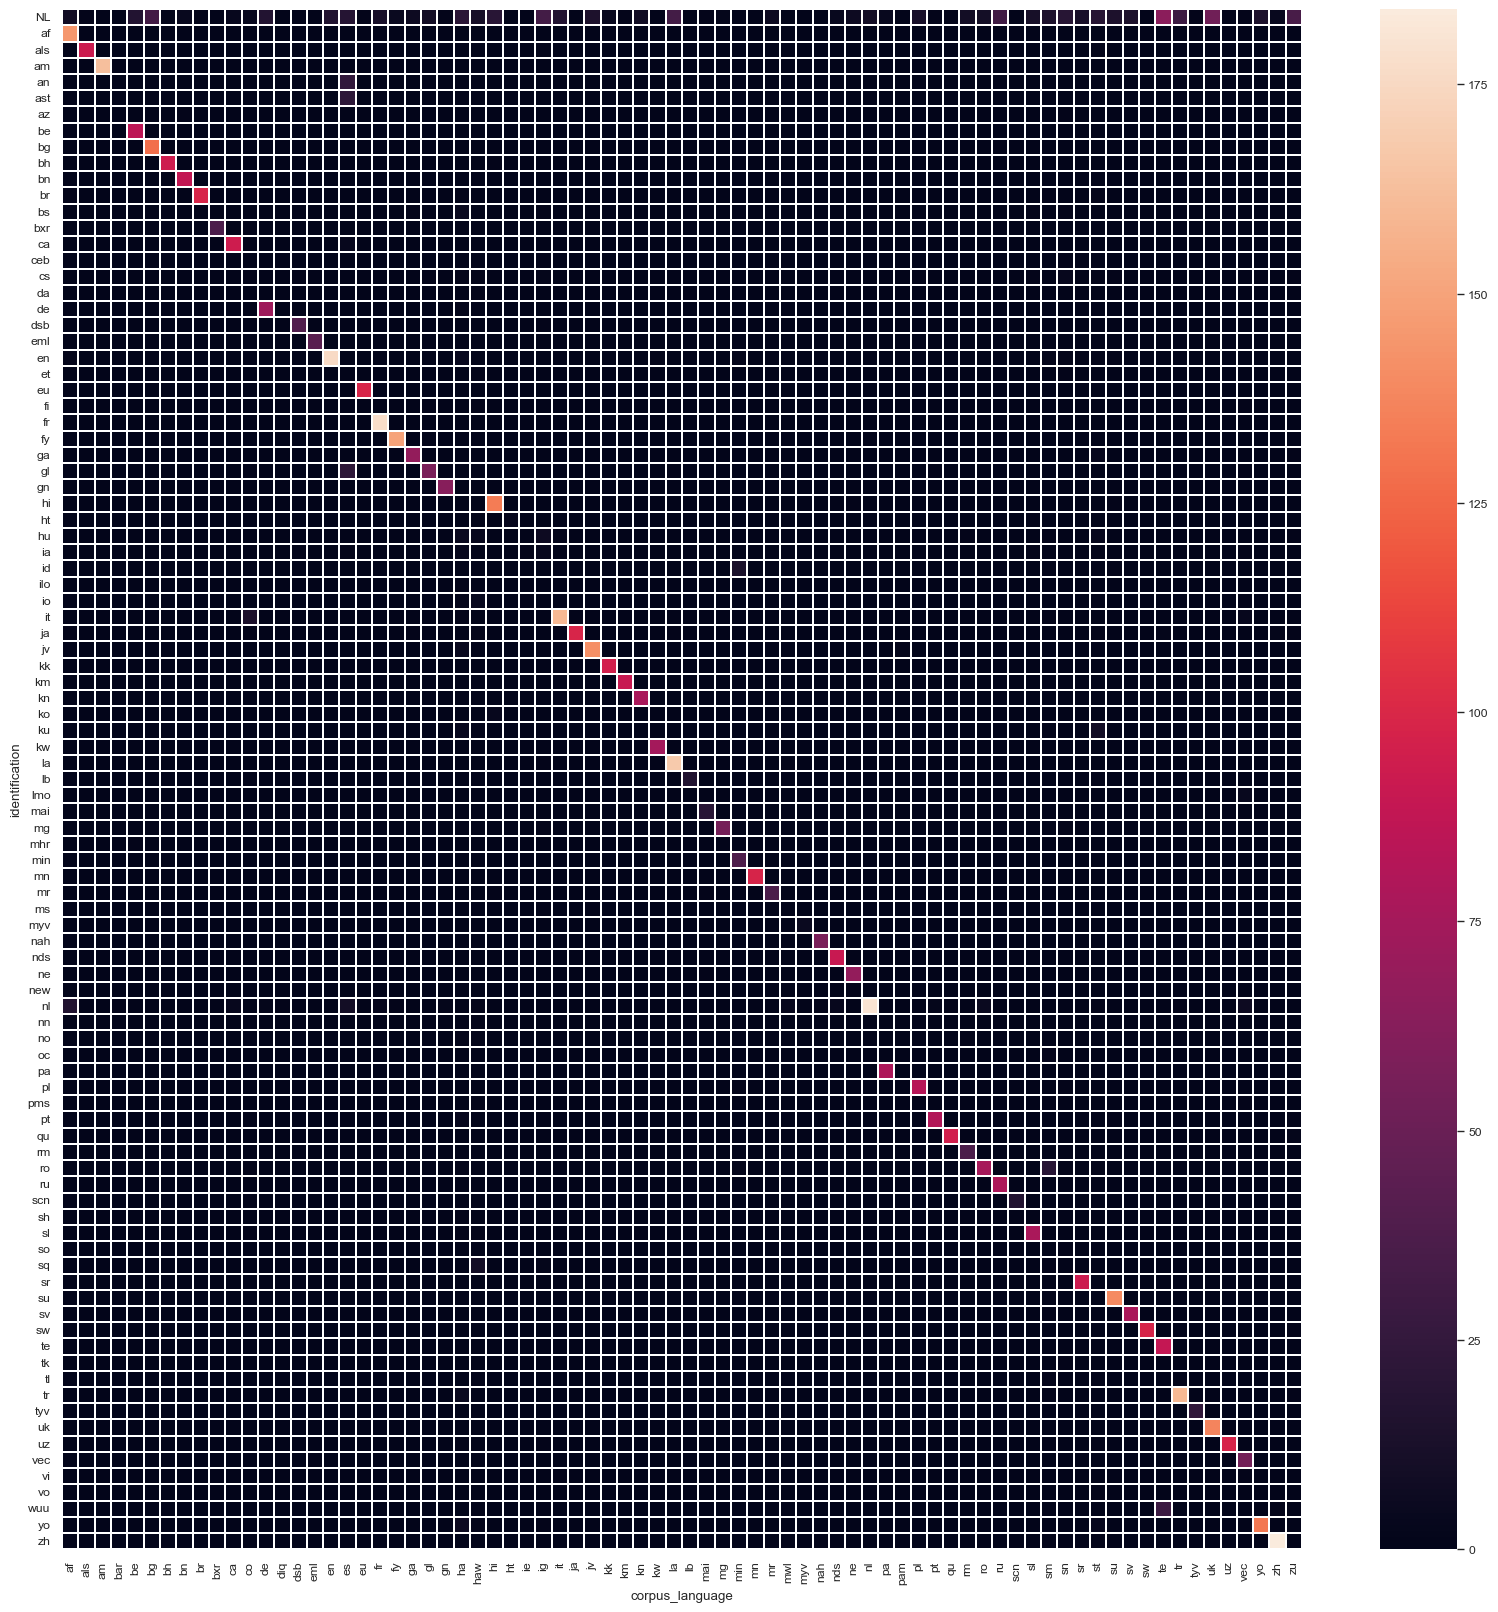

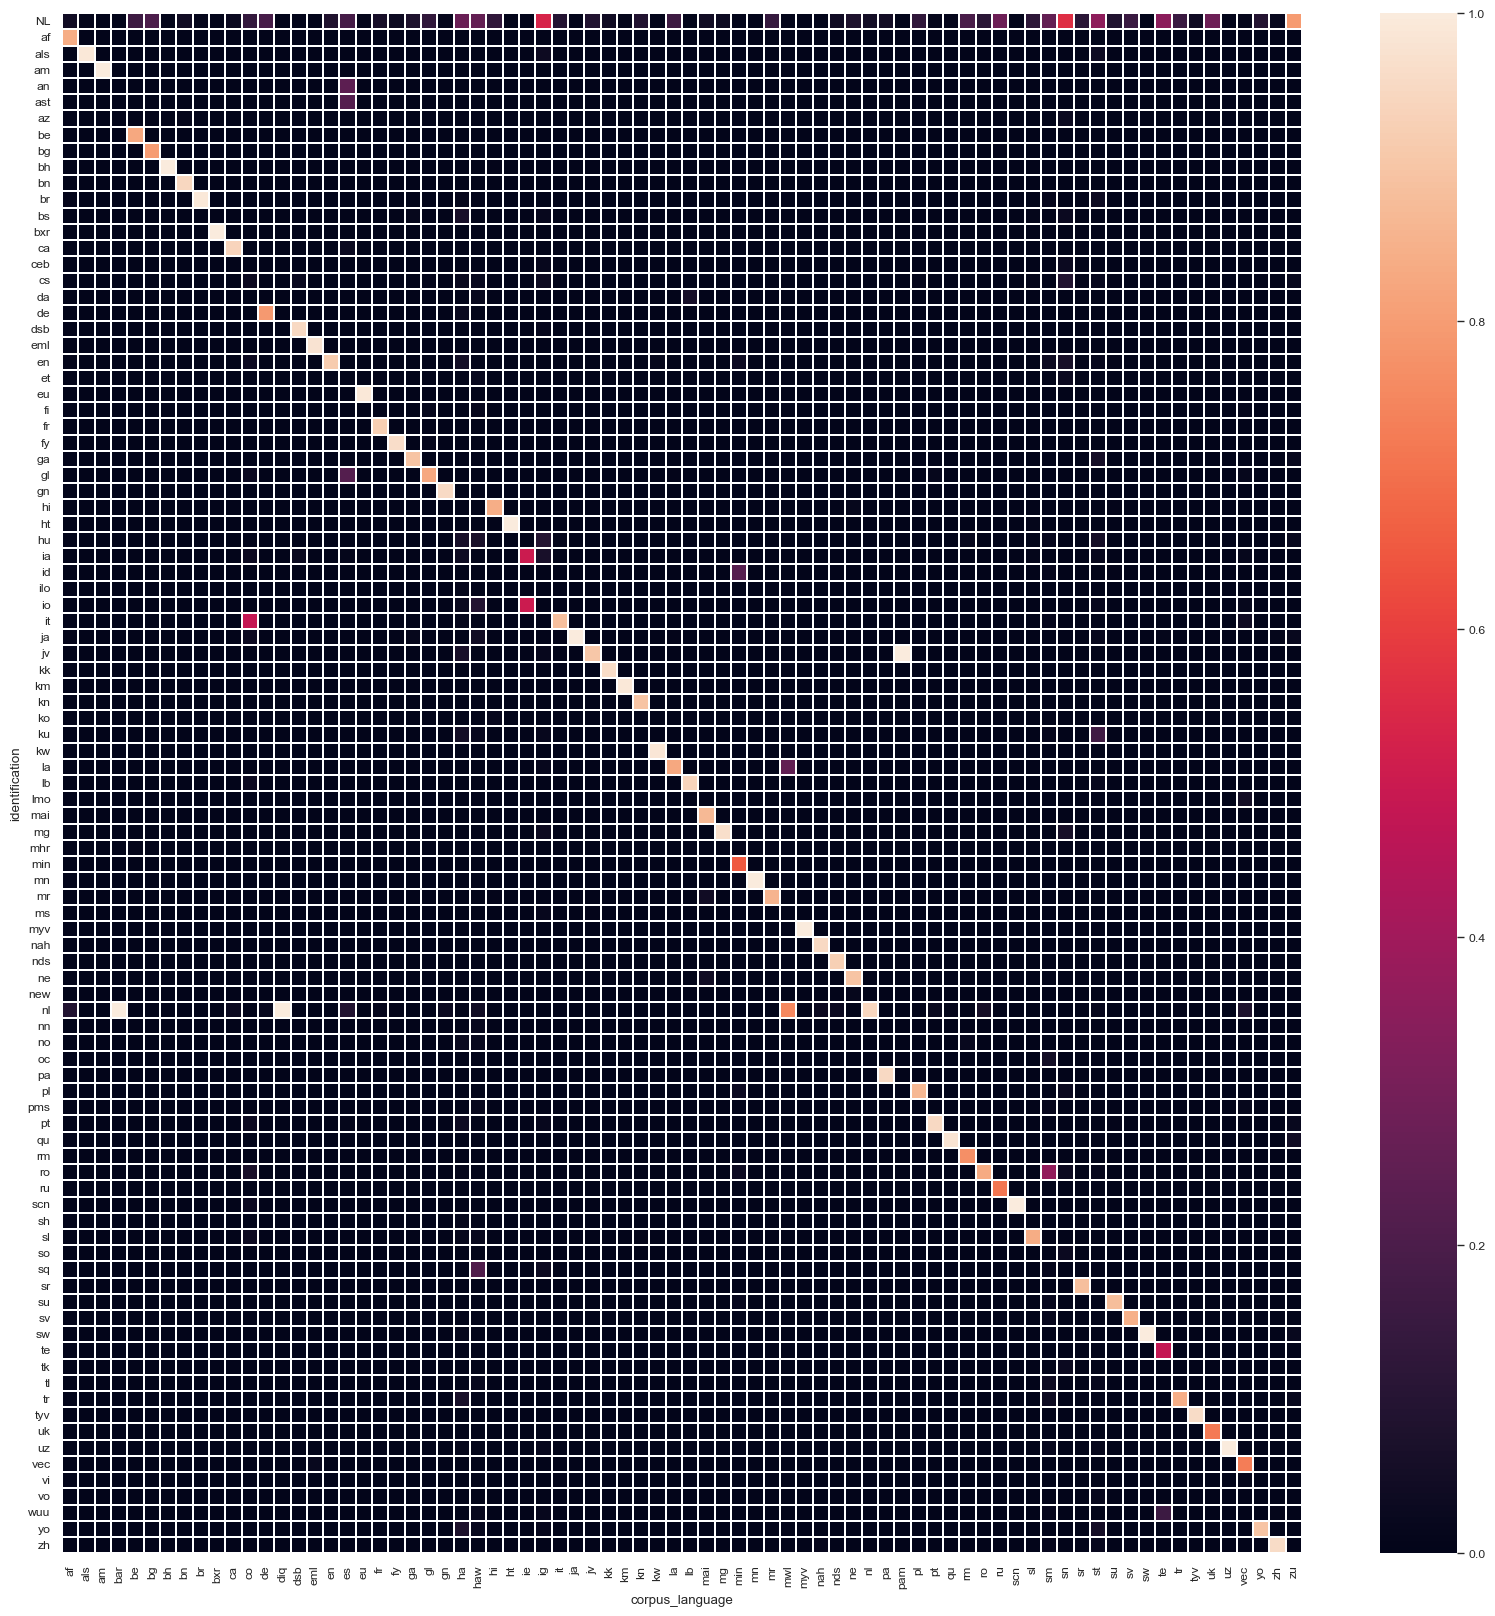

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, NoNorm
plt.figure(figsize=(20, 20))
sns.set_context("paper")
sns.set_style("darkgrid")
sns.heatmap(conf_mtx.T, linewidth=0.1)
plt.show()

plt.figure(figsize=(20, 20))
sns.set_context("paper")
sns.set_style("darkgrid")
sns.heatmap(conf_mtx_pctg.T, linewidth=0.1)
plt.show()

We can get an idea on languages that are frequently confounded by getting the correlation matrix.

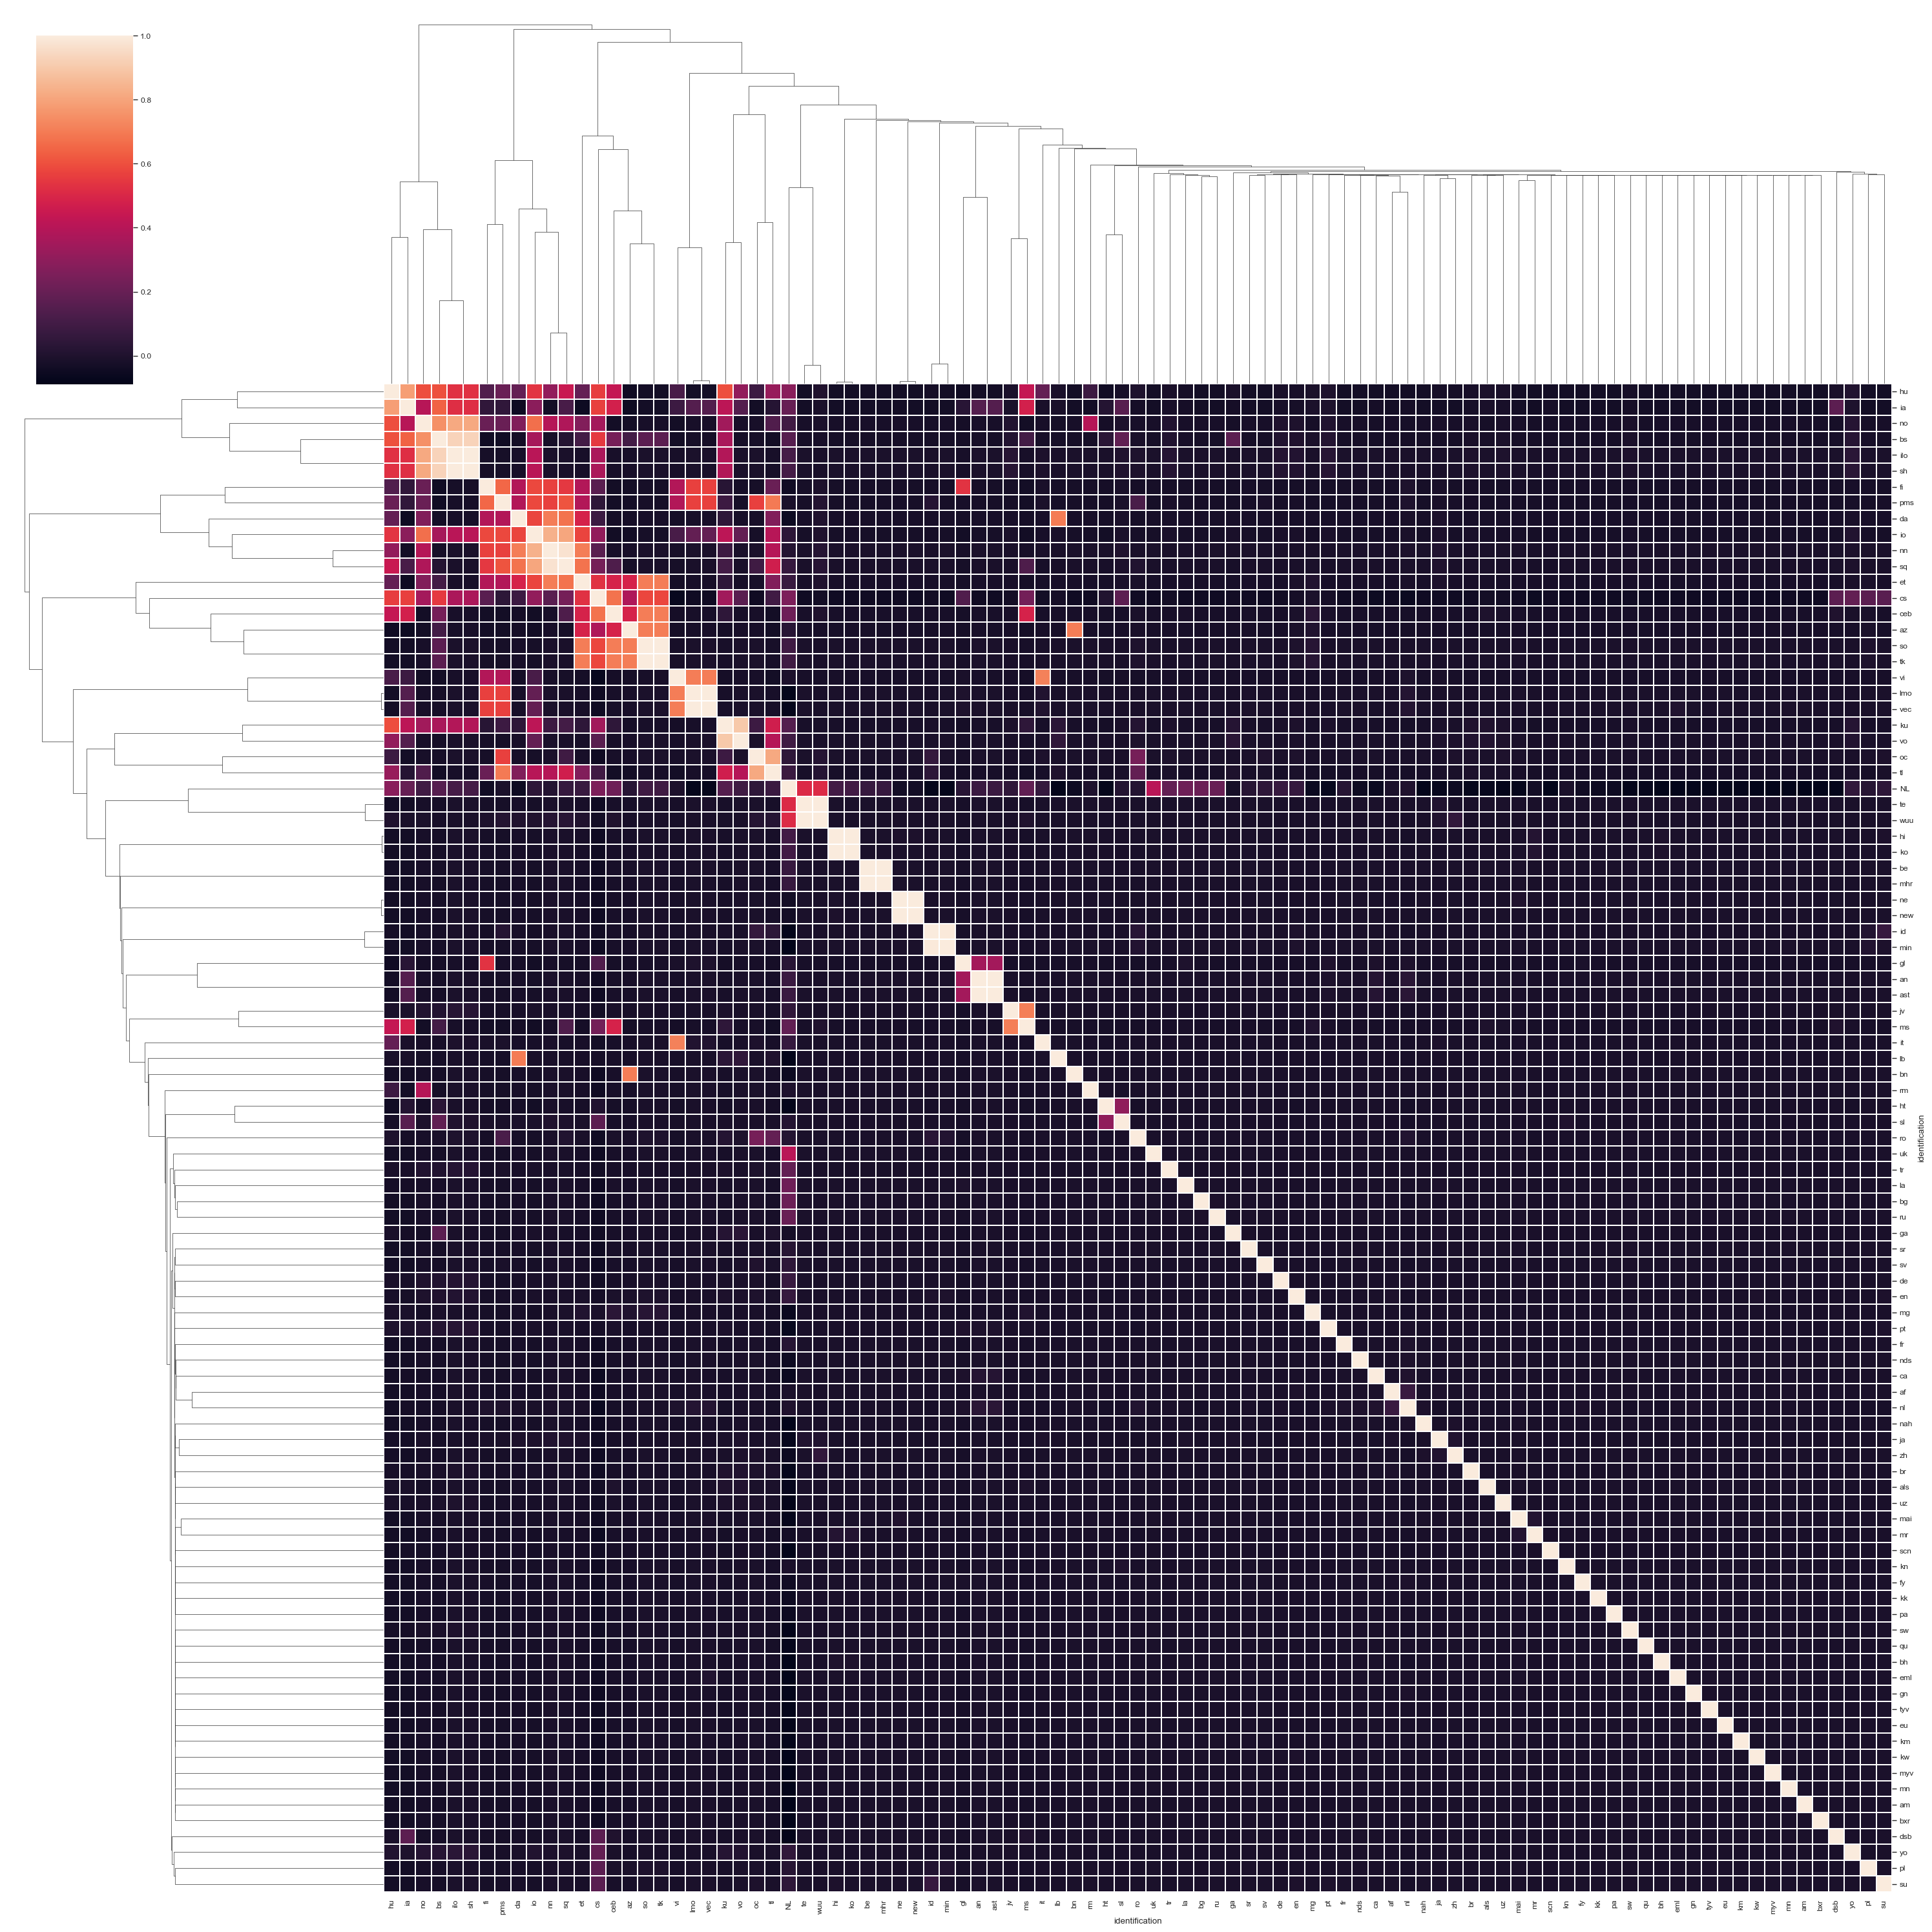

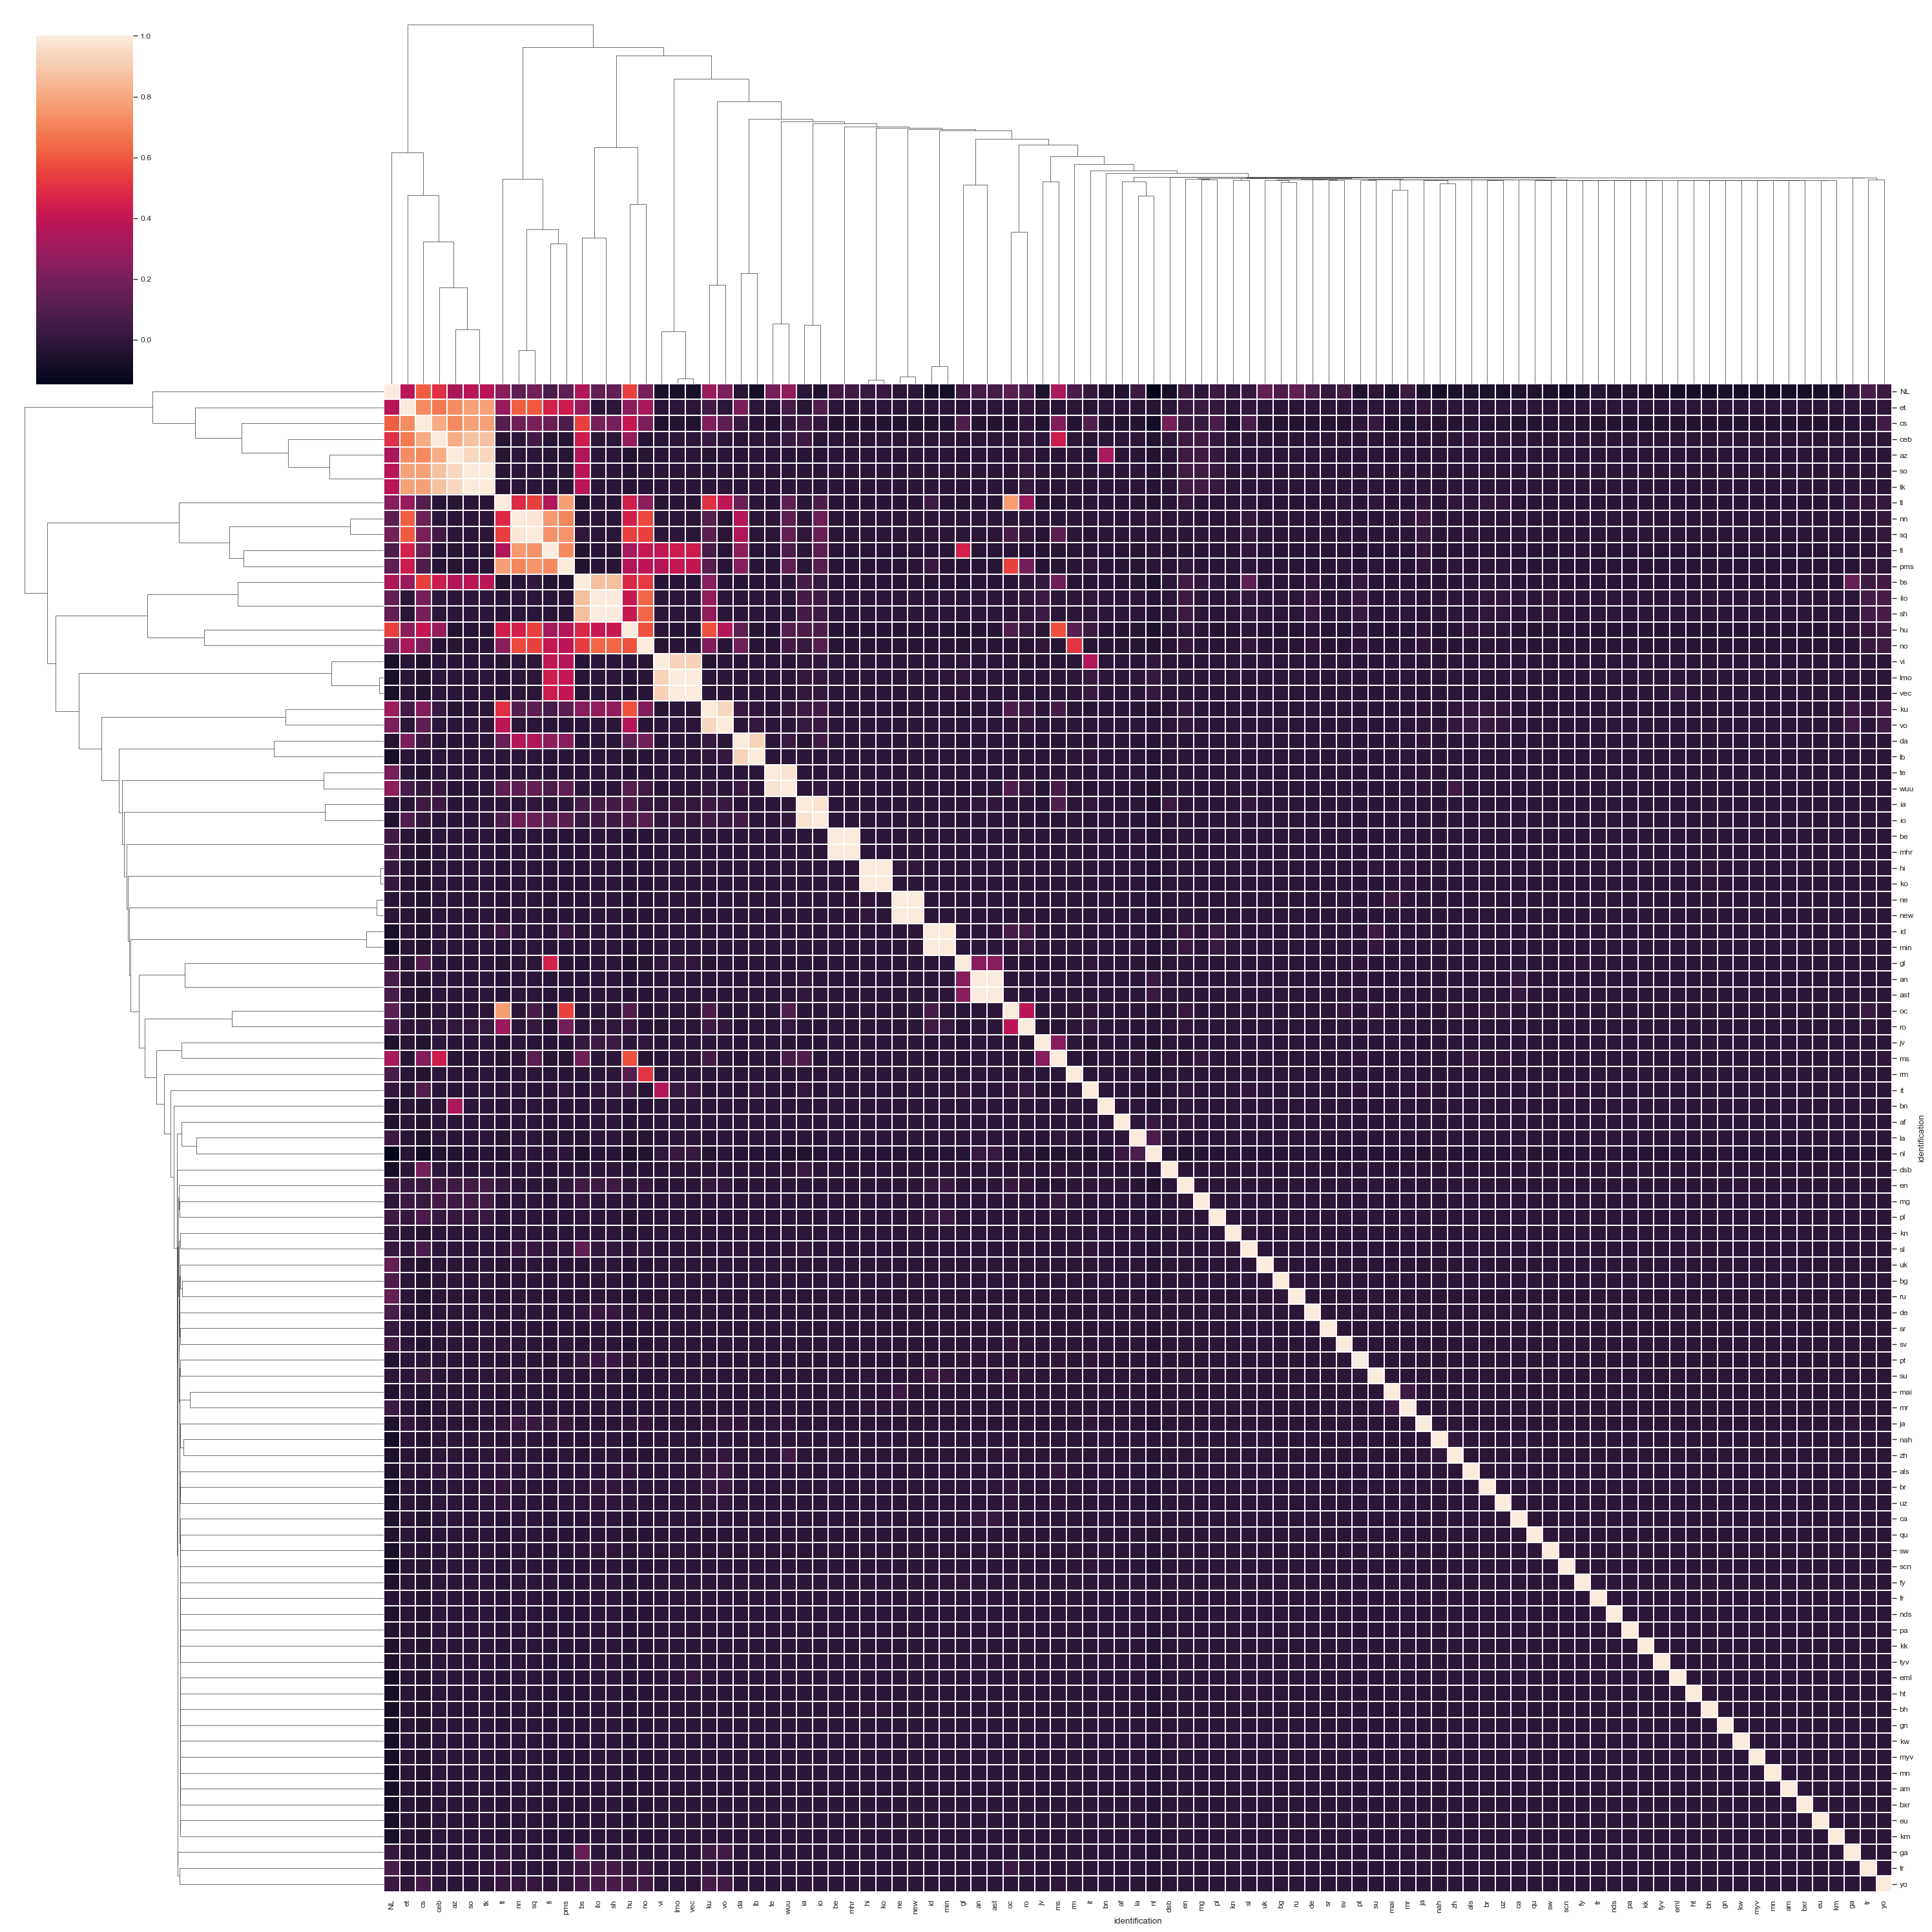

In [236]:
sns.clustermap(conf_mtx.corr(), figsize=(30, 30), linewidth=0.01)
sns.clustermap(conf_mtx_pctg.corr(), figsize=(30, 30), linewidth=0.01)

We have a readability problem: In the case where we put values themselves, we can't see the subtle variations. If we use a logscale we see them better but it's harder to see the languages where mismatches happen frequently. 

In order to better see where things are going wrong, we:
- Set to 0 correct identifications (fr in ground truth, fr in identification)
- Remove lines only constituted of zeroes
- Remove zero values.

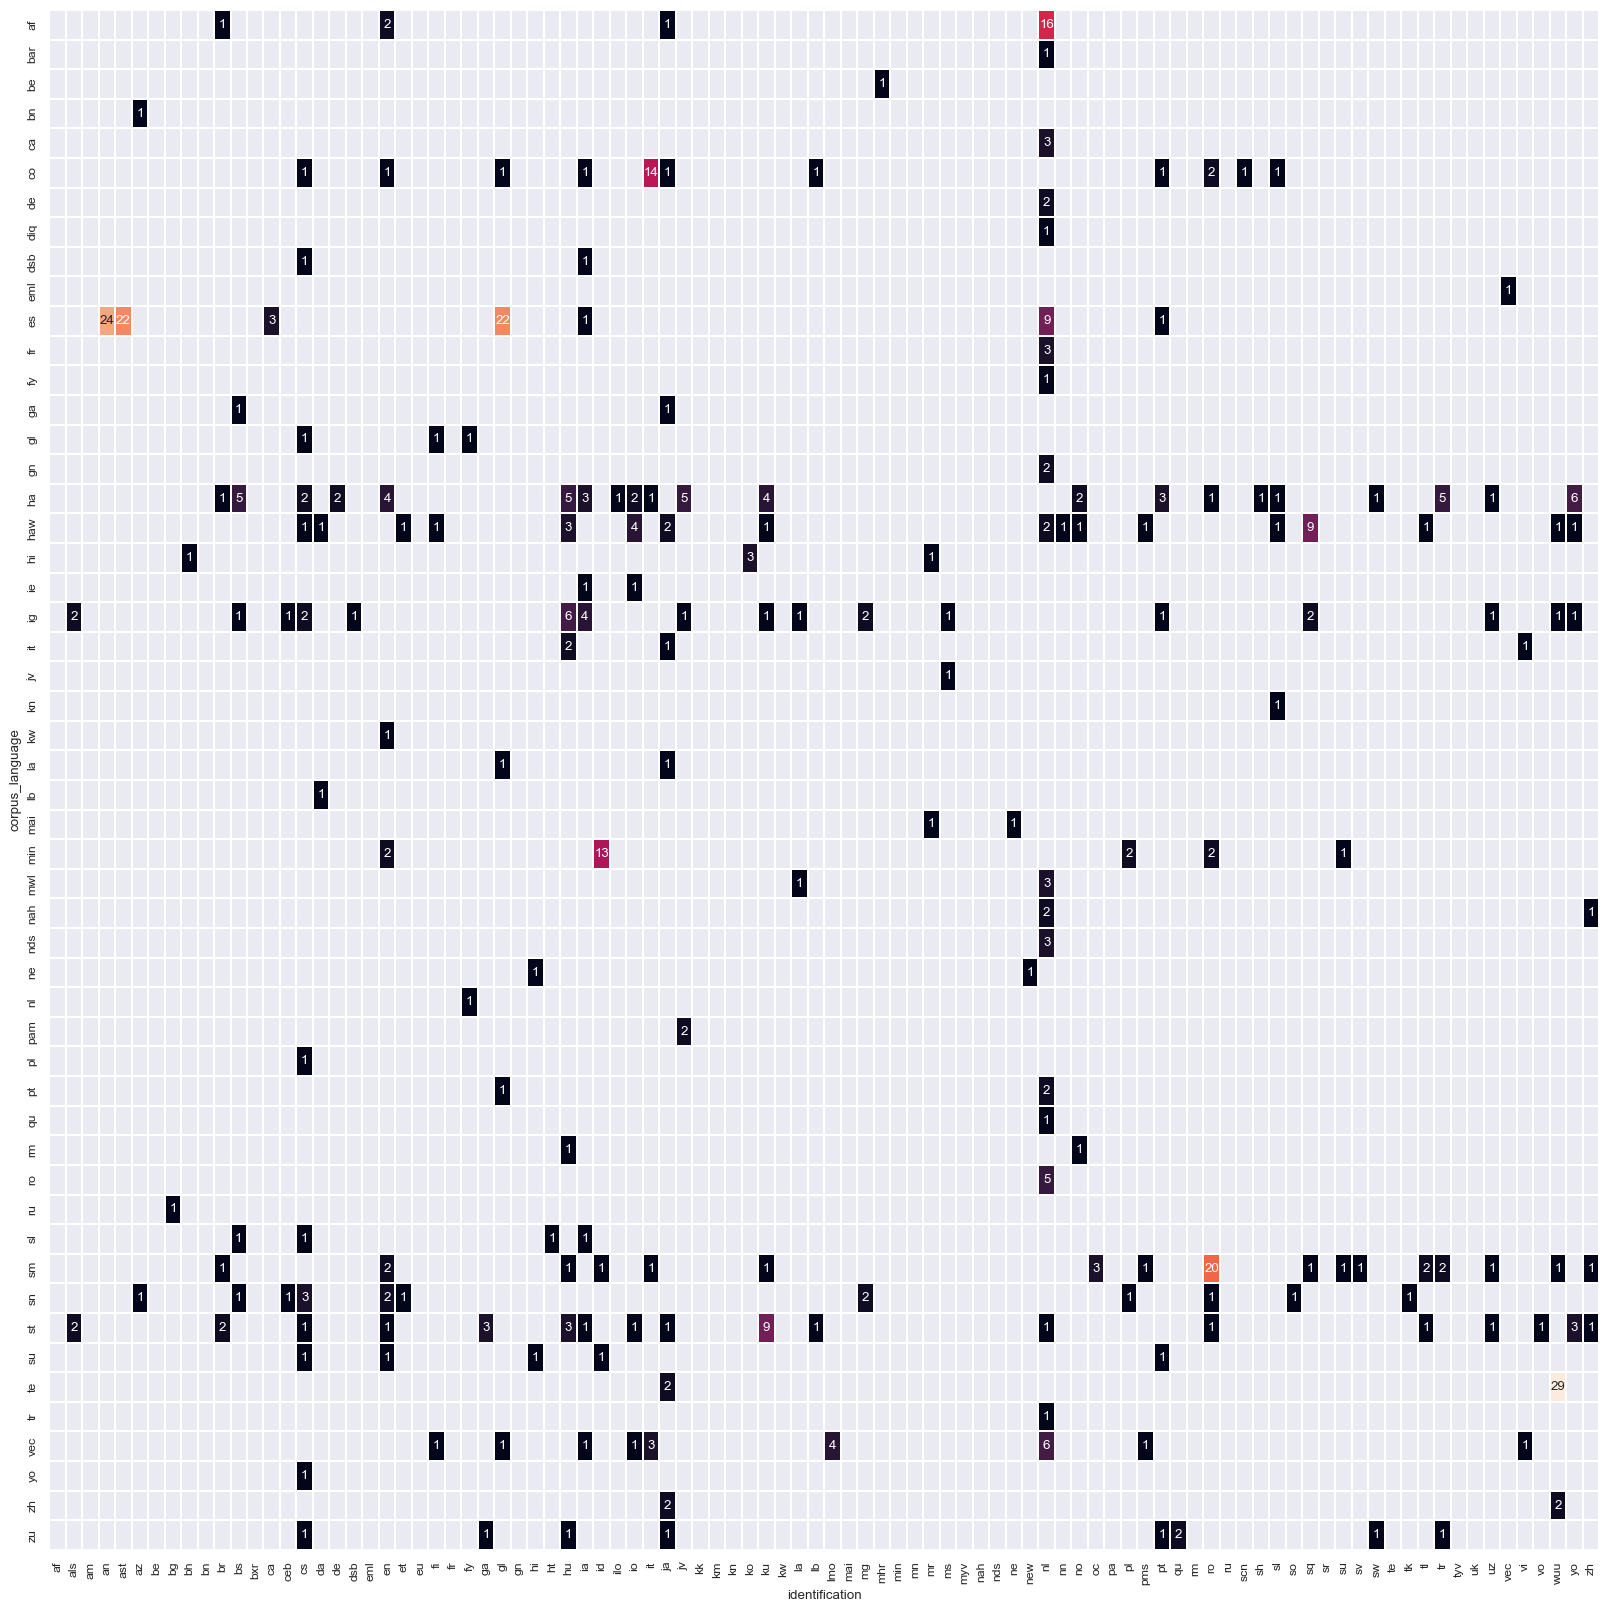

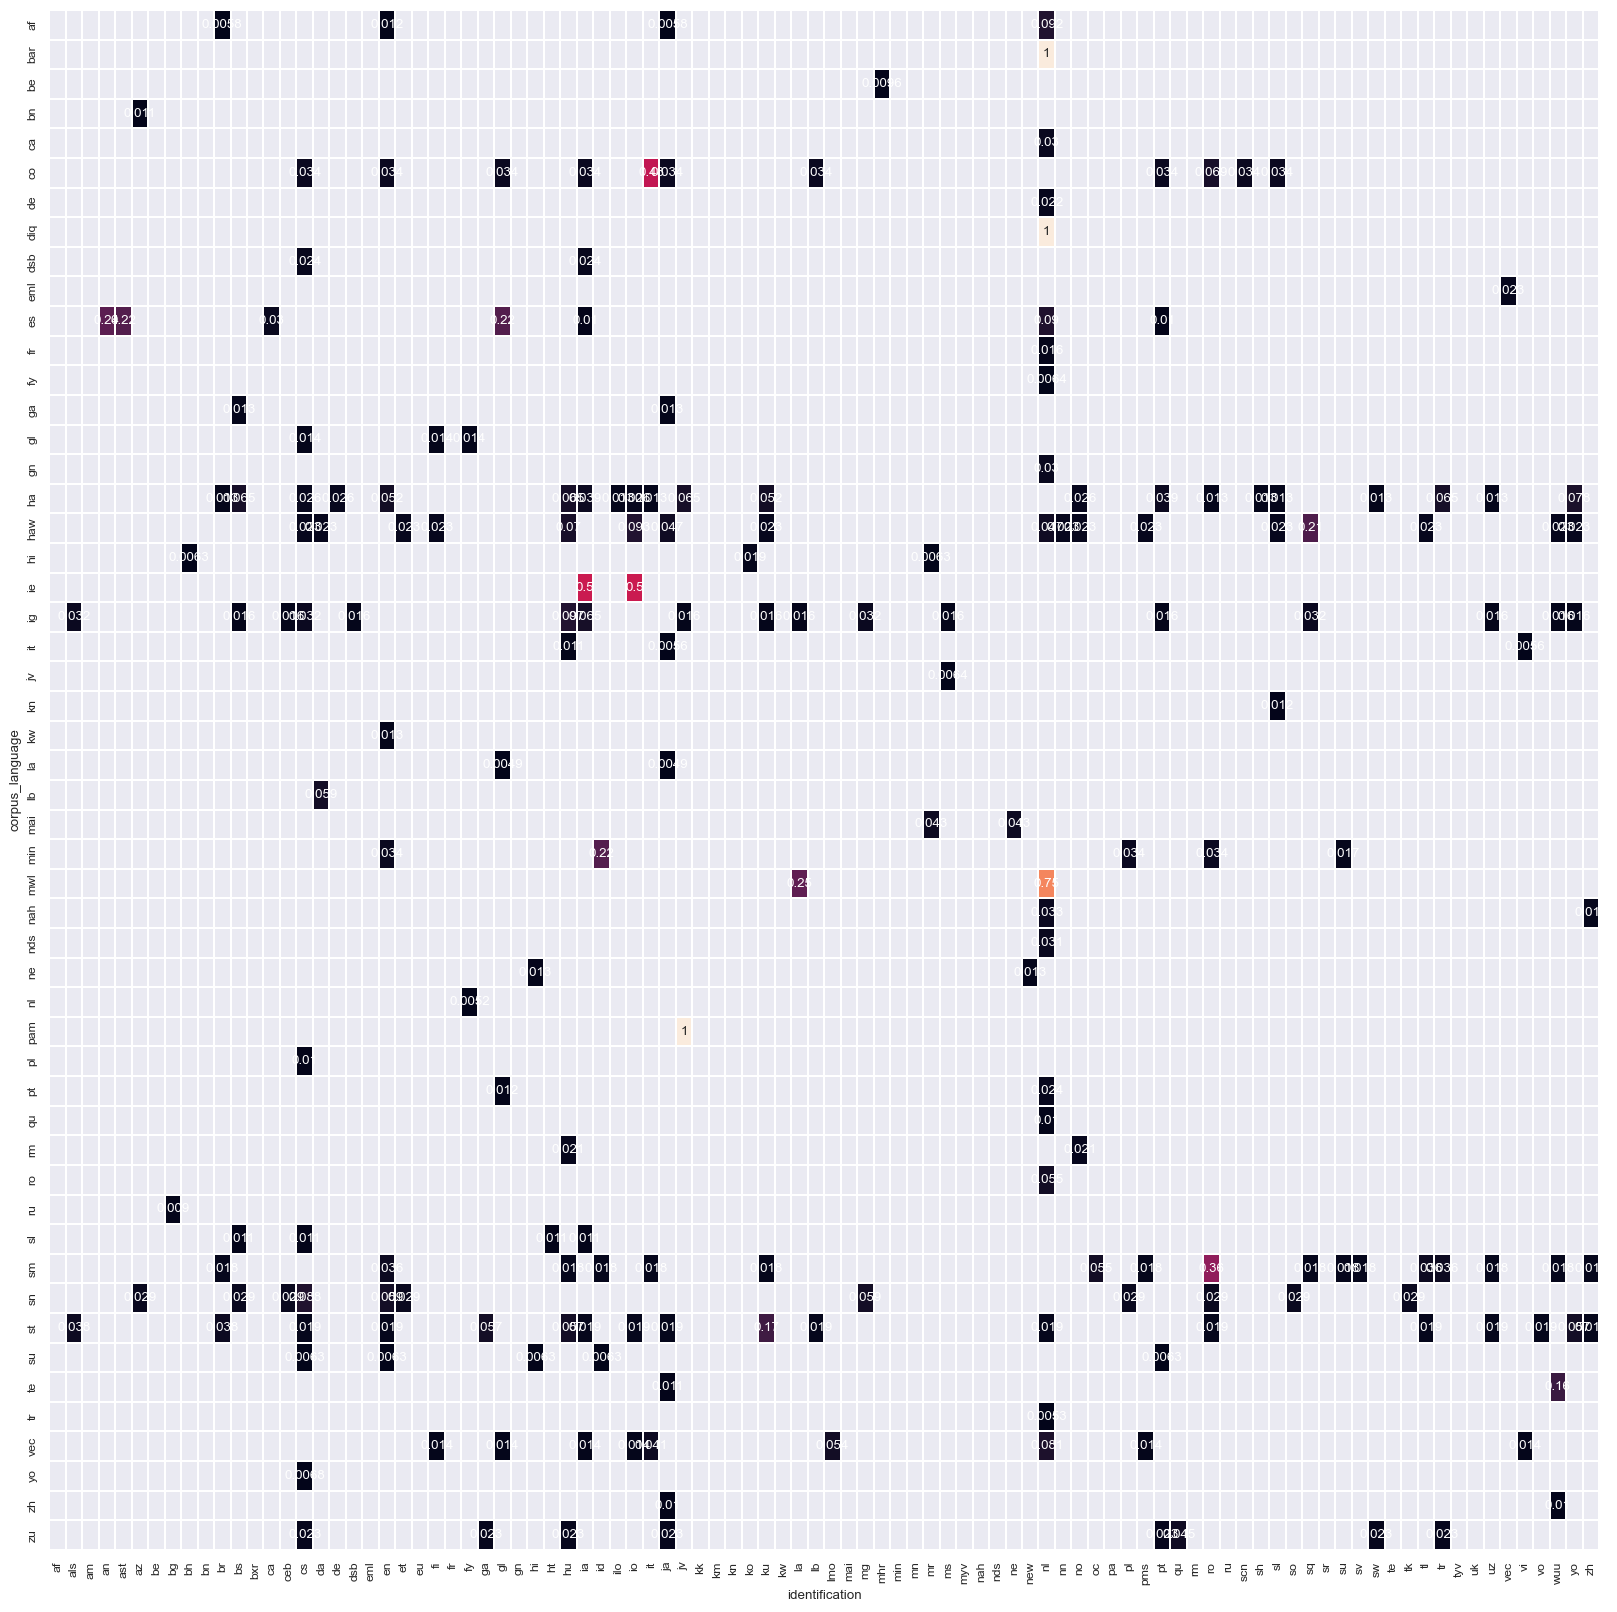

In [234]:
conf_mtx_mismatches_only =conf_mtx.copy()
conf_mtx_mismatches_only_pctg =conf_mtx_pctg.copy()

#ugly
# Set correct ids to 0 to focus on mismatches
for i in conf_mtx_mismatches_only.index:
    try:
        conf_mtx_mismatches_only[i][i] = 0
        conf_mtx_mismatches_only_pctg[i][i] = 0.0
    except KeyError:
        pass

# Remove non linguistic errors
del conf_mtx_mismatches_only["NL"]
del conf_mtx_mismatches_only_pctg["NL"]

# Remove lines that are comprised of zeroes
# from https://stackoverflow.com/a/22650162
conf_mtx_mismatches_only = conf_mtx_mismatches_only.loc[~(conf_mtx_mismatches_only==0).all(axis=1)]
conf_mtx_mismatches_only_pctg = conf_mtx_mismatches_only_pctg.loc[~(conf_mtx_mismatches_only_pctg==0.0).all(axis=1)]

# build mask for 0 values
zero_mask= conf_mtx_mismatches_only.apply(lambda x: x == 0)
zero_mask_pctg = conf_mtx_mismatches_only_pctg.apply(lambda x: x == 0.0)

# plot heatmap
plt.figure(figsize=(20, 20))
sns.set_context("paper")
sns.set_style("darkgrid")
sns.heatmap(conf_mtx_mismatches_only, linewidth=0.1, annot=True, mask=zero_mask, cbar=False)
plt.show()

plt.figure(figsize=(20, 20))
sns.set_context("paper")
sns.set_style("darkgrid")
sns.heatmap(conf_mtx_mismatches_only_pctg, linewidth=0.1, annot=True, mask=zero_mask, cbar=False)
plt.show()

Then we show this as a clustermap again.

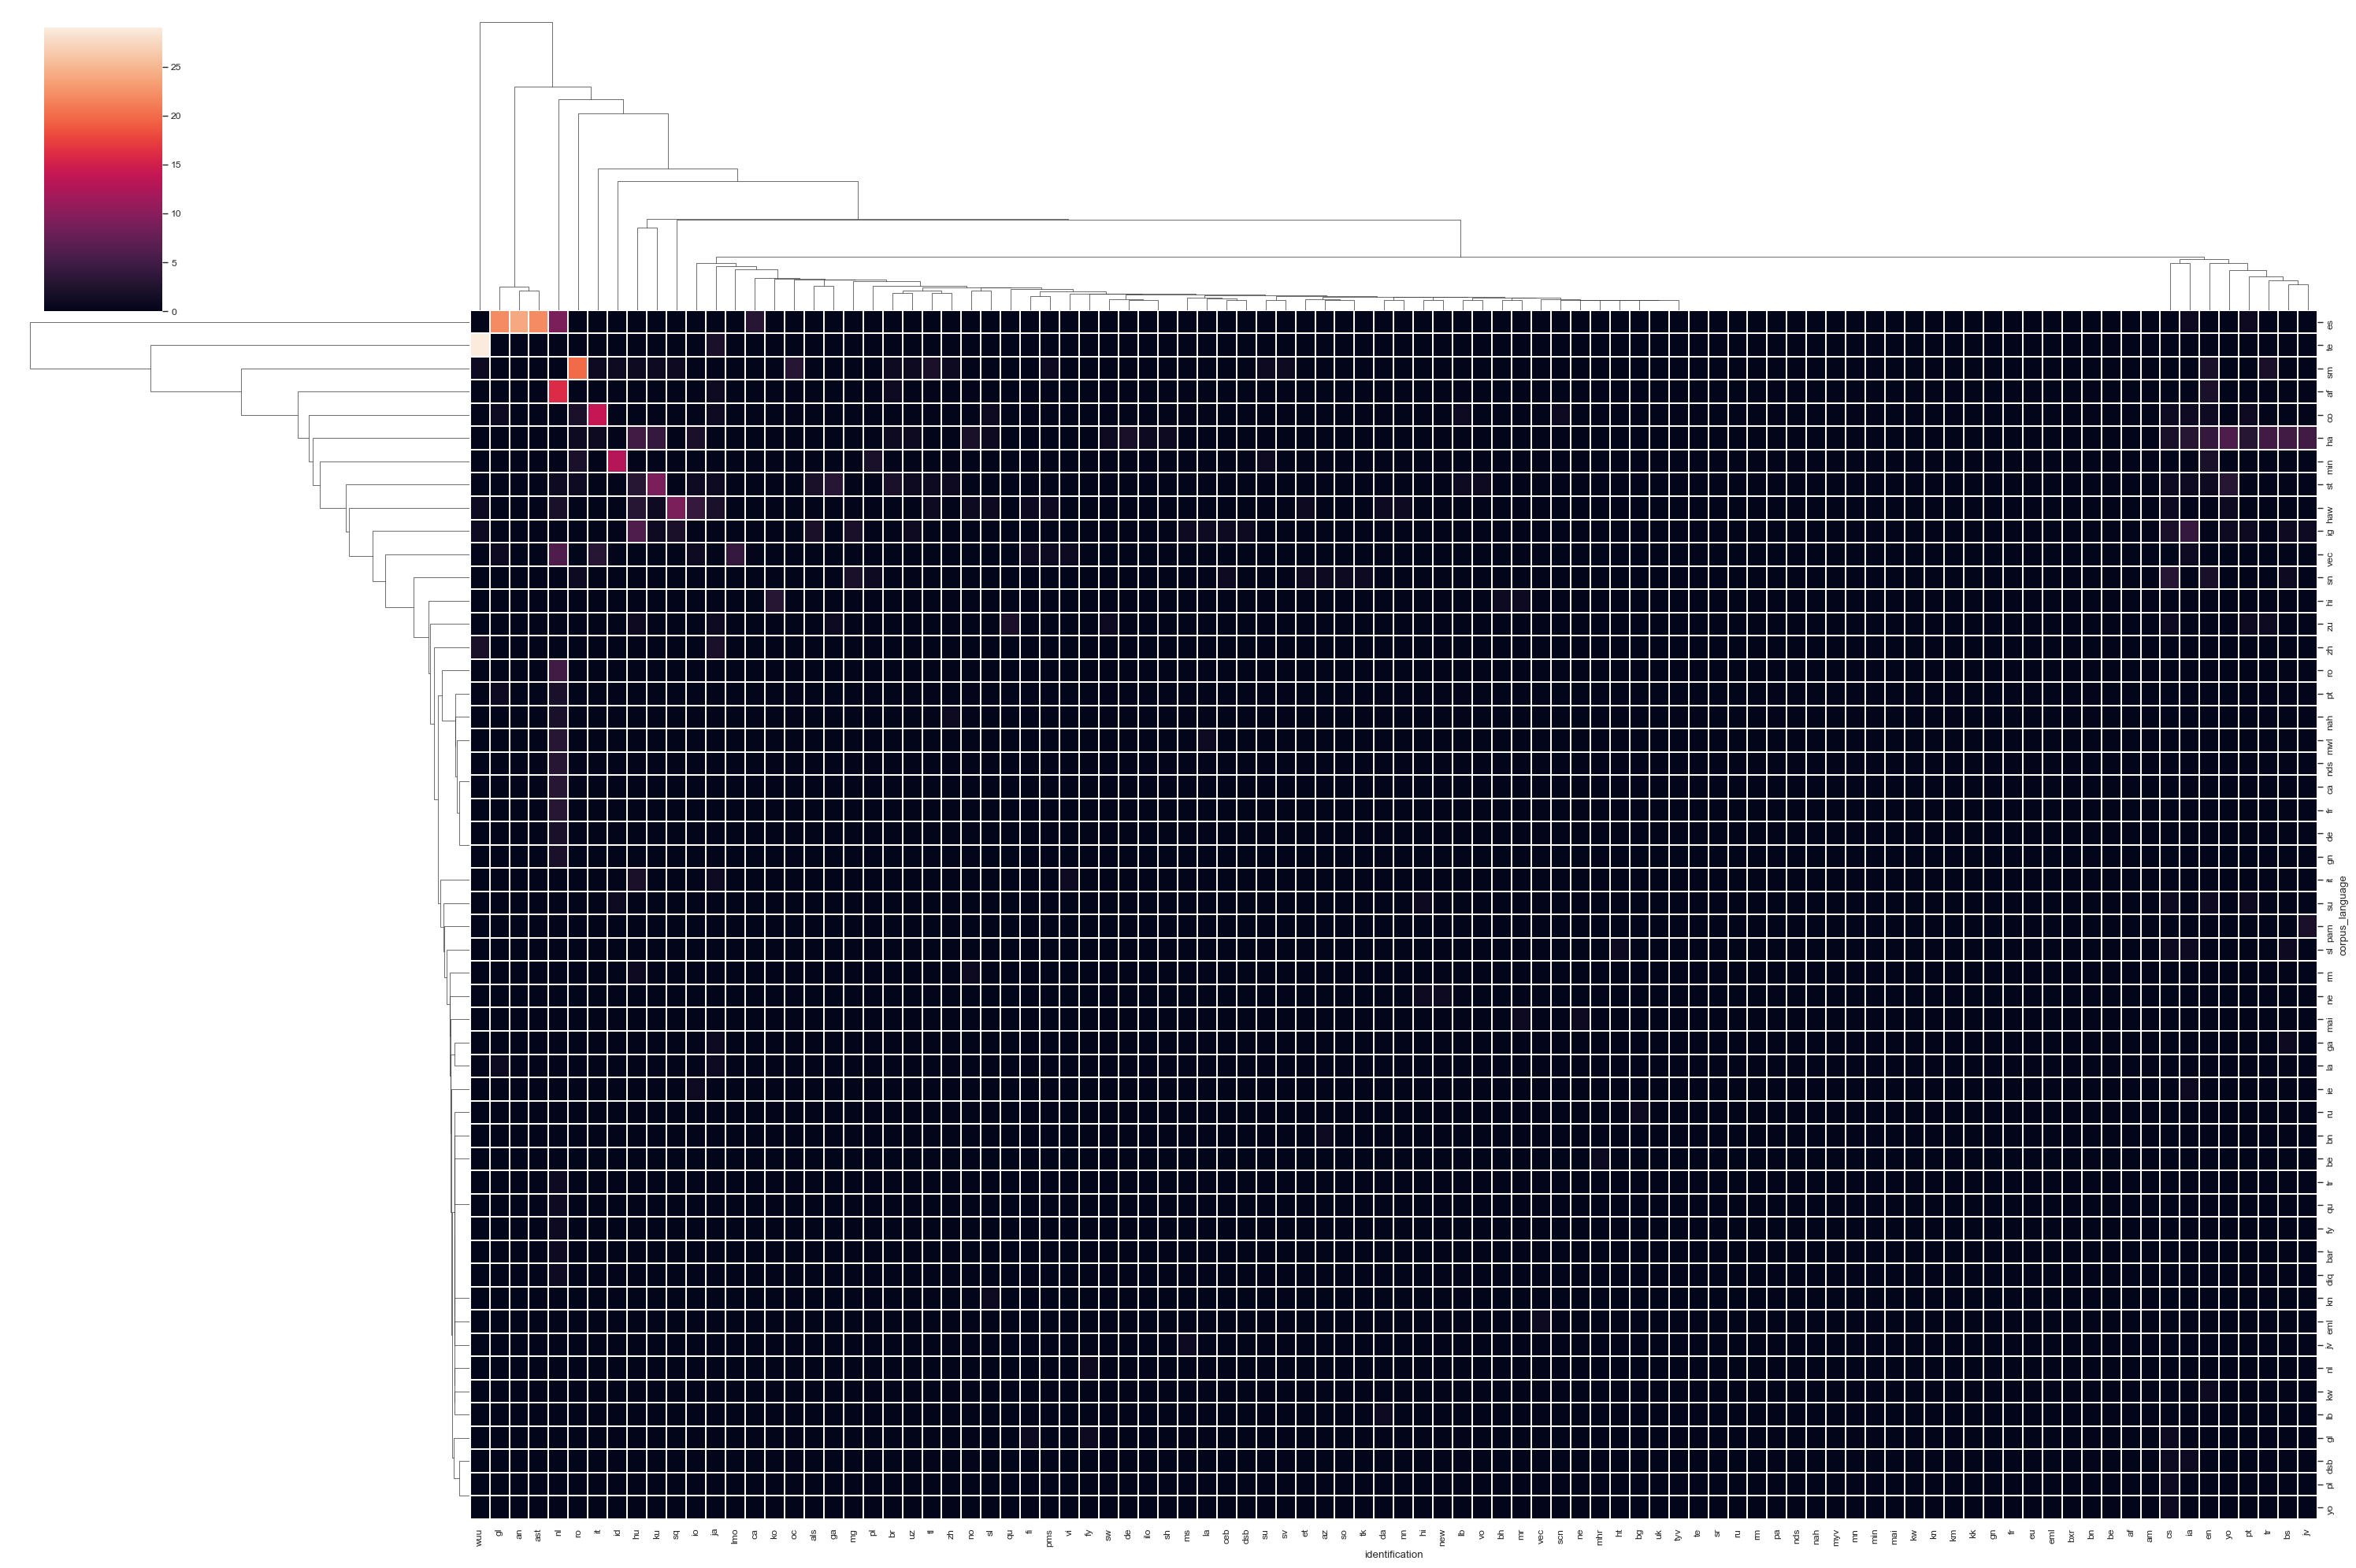

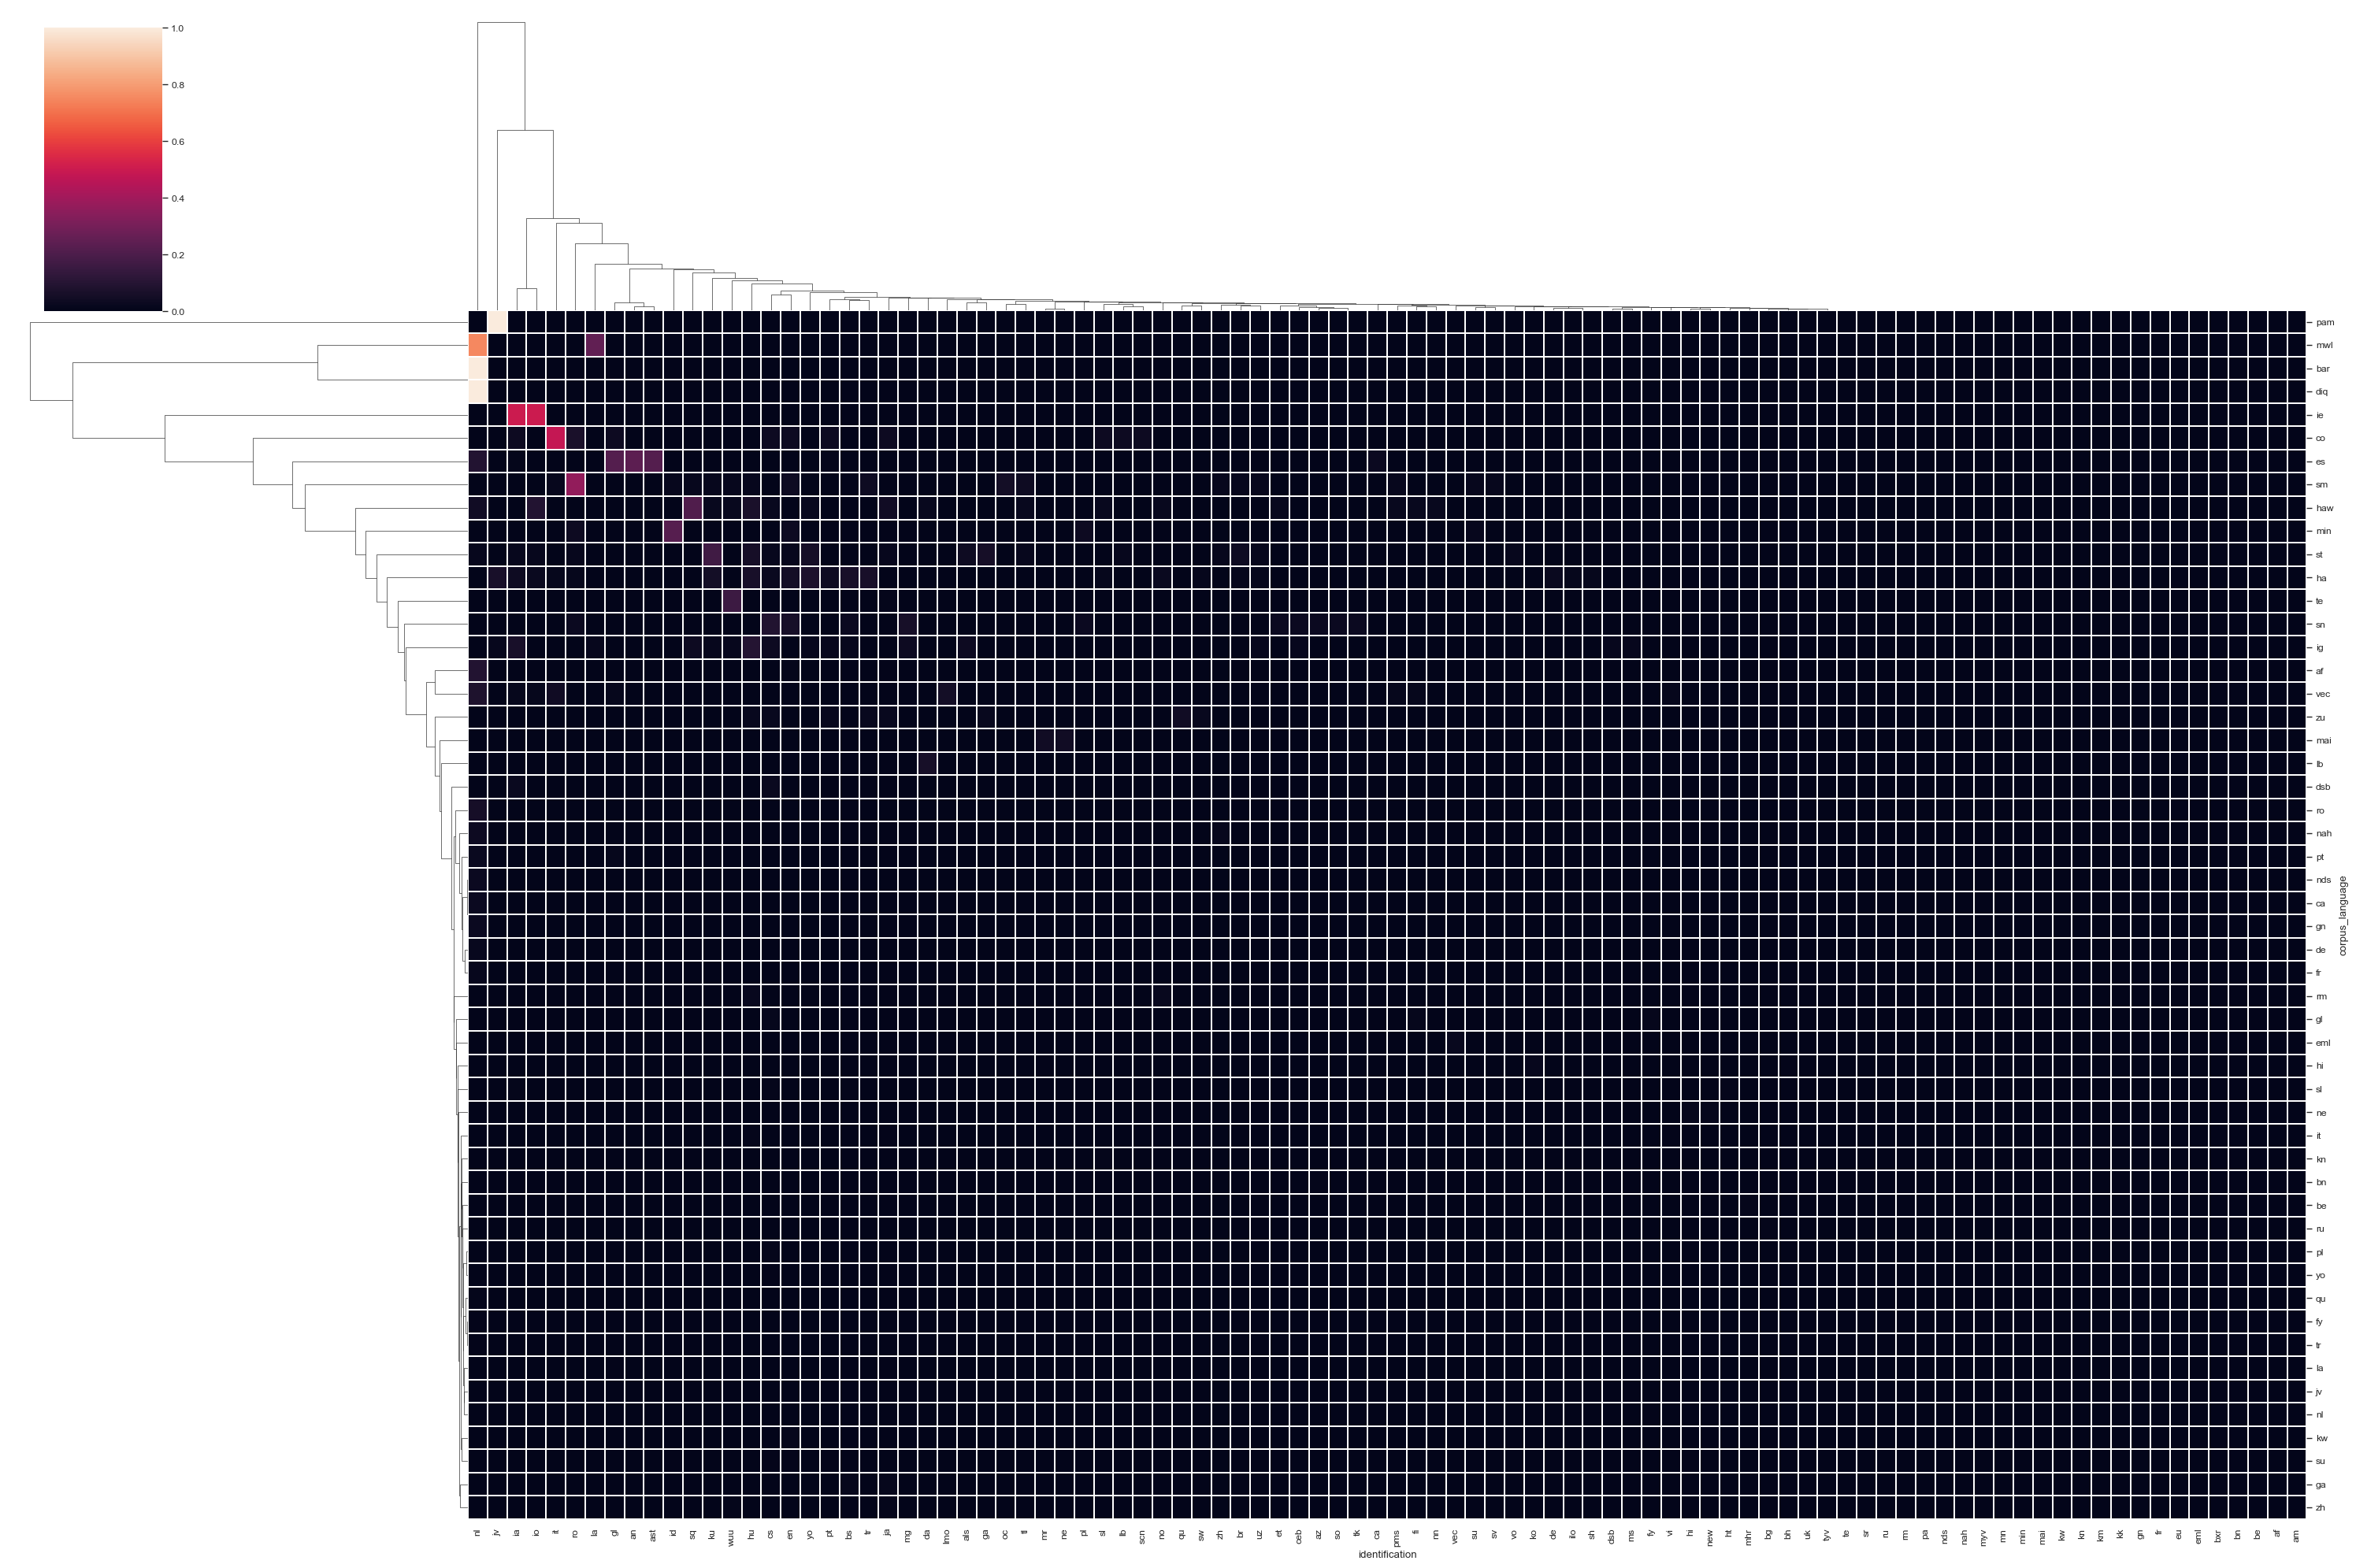

In [239]:
sns.clustermap(conf_mtx_mismatches_only, linewidth=0.01, figsize=(30, 20))
sns.clustermap(conf_mtx_mismatches_only_pctg, linewidth=0.01, figsize=(30, 20))

For manual inspection, we also put out a list of confounded languages for each language.
Something to be aware of: I suspect that nl might be either Dutch or "Non Linguistic". It is something to clarify.

In [291]:
#print(conf_mtx_mismatches_only_pctg)
cmmop = conf_mtx_mismatches_only_pctg.T

for corpus_lang in cmmop:
    print(f" Corpus source: {corpus_lang}")
    # for model_id in conf_mtx_mismatches_only_pctg[corpus_lang]:
    #     print(model_id)
    # print(conf_mtx_mismatches_only_pctg[conf_mtx_mismatches_only_pctg[corpus_lang] != 0.0]) 
    display(cmmop[corpus_lang][cmmop[corpus_lang] != 0])

 Corpus source: af


identification
br    0.005780
en    0.011561
ja    0.005780
nl    0.092486
Name: af, dtype: float64

 Corpus source: bar


identification
nl    1.0
Name: bar, dtype: float64

 Corpus source: be


identification
mhr    0.009615
Name: be, dtype: float64

 Corpus source: bn


identification
az    0.010753
Name: bn, dtype: float64

 Corpus source: ca


identification
nl    0.030303
Name: ca, dtype: float64

 Corpus source: co


identification
cs     0.034483
en     0.034483
gl     0.034483
ia     0.034483
it     0.482759
ja     0.034483
lb     0.034483
pt     0.034483
ro     0.068966
scn    0.034483
sl     0.034483
Name: co, dtype: float64

 Corpus source: de


identification
nl    0.021978
Name: de, dtype: float64

 Corpus source: diq


identification
nl    1.0
Name: diq, dtype: float64

 Corpus source: dsb


identification
cs    0.02439
ia    0.02439
Name: dsb, dtype: float64

 Corpus source: eml


identification
vec    0.023256
Name: eml, dtype: float64

 Corpus source: es


identification
an     0.24
ast    0.22
ca     0.03
gl     0.22
ia     0.01
nl     0.09
pt     0.01
Name: es, dtype: float64

 Corpus source: fr


identification
nl    0.015625
Name: fr, dtype: float64

 Corpus source: fy


identification
nl    0.00641
Name: fy, dtype: float64

 Corpus source: ga


identification
bs    0.013158
ja    0.013158
Name: ga, dtype: float64

 Corpus source: gl


identification
cs    0.014493
fi    0.014493
fy    0.014493
Name: gl, dtype: float64

 Corpus source: gn


identification
nl    0.030303
Name: gn, dtype: float64

 Corpus source: ha


identification
br     0.012987
bs     0.064935
cs     0.025974
de     0.025974
en     0.051948
hu     0.064935
ia     0.038961
ilo    0.012987
io     0.025974
it     0.012987
jv     0.064935
ku     0.051948
no     0.025974
pt     0.038961
ro     0.012987
sh     0.012987
sl     0.012987
sw     0.012987
tr     0.064935
uz     0.012987
yo     0.077922
Name: ha, dtype: float64

 Corpus source: haw


identification
cs     0.023256
da     0.023256
et     0.023256
fi     0.023256
hu     0.069767
io     0.093023
ja     0.046512
ku     0.023256
nl     0.046512
nn     0.023256
no     0.023256
pms    0.023256
sl     0.023256
sq     0.209302
tl     0.023256
wuu    0.023256
yo     0.023256
Name: haw, dtype: float64

 Corpus source: hi


identification
bh    0.006329
ko    0.018987
mr    0.006329
Name: hi, dtype: float64

 Corpus source: ie


identification
ia    0.5
io    0.5
Name: ie, dtype: float64

 Corpus source: ig


identification
als    0.032258
bs     0.016129
ceb    0.016129
cs     0.032258
dsb    0.016129
hu     0.096774
ia     0.064516
jv     0.016129
ku     0.016129
la     0.016129
mg     0.032258
ms     0.016129
pt     0.016129
sq     0.032258
uz     0.016129
wuu    0.016129
yo     0.016129
Name: ig, dtype: float64

 Corpus source: it


identification
hu    0.011111
ja    0.005556
vi    0.005556
Name: it, dtype: float64

 Corpus source: jv


identification
ms    0.00641
Name: jv, dtype: float64

 Corpus source: kn


identification
sl    0.011628
Name: kn, dtype: float64

 Corpus source: kw


identification
en    0.013158
Name: kw, dtype: float64

 Corpus source: la


identification
gl    0.004926
ja    0.004926
Name: la, dtype: float64

 Corpus source: lb


identification
da    0.058824
Name: lb, dtype: float64

 Corpus source: mai


identification
mr    0.043478
ne    0.043478
Name: mai, dtype: float64

 Corpus source: min


identification
en    0.034483
id    0.224138
pl    0.034483
ro    0.034483
su    0.017241
Name: min, dtype: float64

 Corpus source: mwl


identification
la    0.25
nl    0.75
Name: mwl, dtype: float64

 Corpus source: nah


identification
nl    0.033333
zh    0.016667
Name: nah, dtype: float64

 Corpus source: nds


identification
nl    0.030612
Name: nds, dtype: float64

 Corpus source: ne


identification
hi     0.013158
new    0.013158
Name: ne, dtype: float64

 Corpus source: nl


identification
fy    0.005236
Name: nl, dtype: float64

 Corpus source: pam


identification
jv    1.0
Name: pam, dtype: float64

 Corpus source: pl


identification
cs    0.010417
Name: pl, dtype: float64

 Corpus source: pt


identification
gl    0.011765
nl    0.023529
Name: pt, dtype: float64

 Corpus source: qu


identification
nl    0.010309
Name: qu, dtype: float64

 Corpus source: rm


identification
hu    0.021277
no    0.021277
Name: rm, dtype: float64

 Corpus source: ro


identification
nl    0.054945
Name: ro, dtype: float64

 Corpus source: ru


identification
bg    0.009009
Name: ru, dtype: float64

 Corpus source: sl


identification
bs    0.01087
cs    0.01087
ht    0.01087
ia    0.01087
Name: sl, dtype: float64

 Corpus source: sm


identification
br     0.018182
en     0.036364
hu     0.018182
id     0.018182
it     0.018182
ku     0.018182
oc     0.054545
pms    0.018182
ro     0.363636
sq     0.018182
su     0.018182
sv     0.018182
tl     0.036364
tr     0.036364
uz     0.018182
wuu    0.018182
zh     0.018182
Name: sm, dtype: float64

 Corpus source: sn


identification
az     0.029412
bs     0.029412
ceb    0.029412
cs     0.088235
en     0.058824
et     0.029412
mg     0.058824
pl     0.029412
ro     0.029412
so     0.029412
tk     0.029412
Name: sn, dtype: float64

 Corpus source: st


identification
als    0.037736
br     0.037736
cs     0.018868
en     0.018868
ga     0.056604
hu     0.056604
ia     0.018868
io     0.018868
ja     0.018868
ku     0.169811
lb     0.018868
nl     0.018868
ro     0.018868
tl     0.018868
uz     0.018868
vo     0.018868
yo     0.056604
zh     0.018868
Name: st, dtype: float64

 Corpus source: su


identification
cs    0.006329
en    0.006329
hi    0.006329
id    0.006329
pt    0.006329
Name: su, dtype: float64

 Corpus source: te


identification
ja     0.010870
wuu    0.157609
Name: te, dtype: float64

 Corpus source: tr


identification
nl    0.005291
Name: tr, dtype: float64

 Corpus source: vec


identification
fi     0.013514
gl     0.013514
ia     0.013514
io     0.013514
it     0.040541
lmo    0.054054
nl     0.081081
pms    0.013514
vi     0.013514
Name: vec, dtype: float64

 Corpus source: yo


identification
cs    0.006803
Name: yo, dtype: float64

 Corpus source: zh


identification
ja     0.010417
wuu    0.010417
Name: zh, dtype: float64

 Corpus source: zu


identification
cs    0.022727
ga    0.022727
hu    0.022727
ja    0.022727
pt    0.022727
qu    0.045455
sw    0.022727
tr    0.022727
Name: zu, dtype: float64

In [48]:
keys_names = []
for k in evl.keys():
    keys_names.append(k.rpartition('.')[2])


In [49]:
l = []
eval_oscar = {}
for k, v in evl.items():
    for i in v.values():
        if i == k.rpartition('.')[2]:
            l.append('cc')
        elif i == 'NL':
            l.append('nl')
        elif i != 'NL' and i in keys_names:
            l.append('wl')
        else:
            l.append('nl')
    eval_oscar[k] = l.copy()
    l.clear()

In [50]:
dic_cm = {}
cm = []
for keys, pred in eval_oscar.items():
    for k, true in code.items():
        if k == keys:
            dic_cm[k] = confusion_matrix(true, pred, labels = ['cc', 'wl', 'nl'])    
        else:
            continue
    


In [56]:
def printcm(dic):
        for lang, arr in dic.items():
            classes = ['cc', 'wl', 'nl']
            figure, ax = plot_confusion_matrix(conf_mat = arr, class_names = classes, show_absolute = True, show_normed = False, colorbar = True)
            file = lang+'.png'
            plt.savefig(os.path.join(path_to_save, file))

In [216]:
# eval_oscar holds predictions from the model
# code is the ground truth from Quality at a Glance
# Both of them are dictionaries that map a (corpus, language) to a list of evaluations (CC, WL, NL)

/Users/jabadji/Library/Caches/pypoetry/virtualenvs/fancynamepy-YeEFVZyw-py3.9/lib/python3.9/site-packages/mlxtend/plotting/plot_confusion_matrix.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


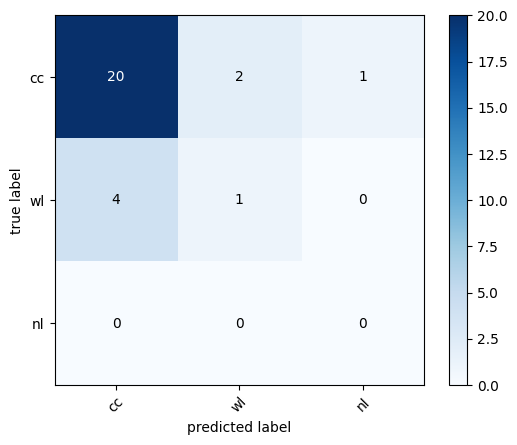

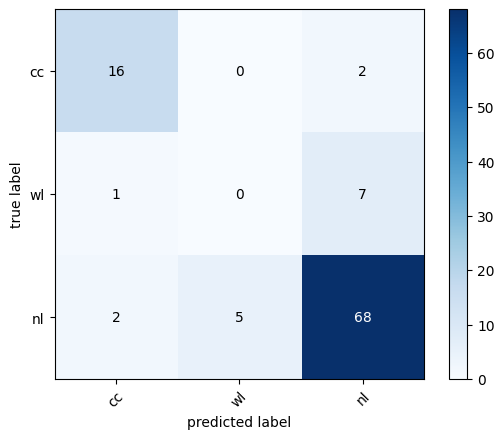

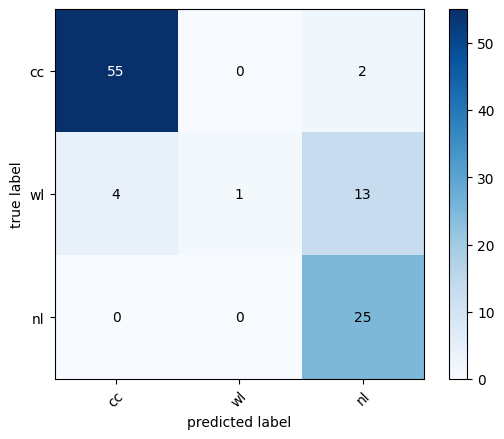

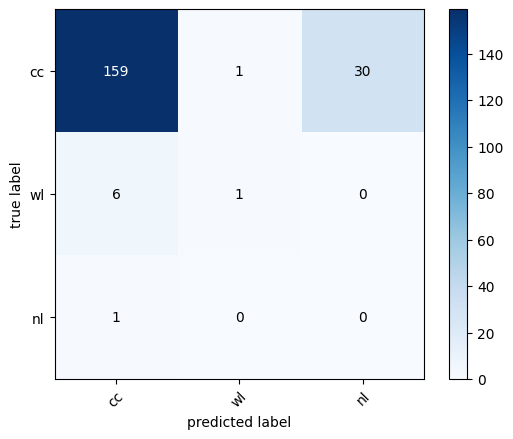

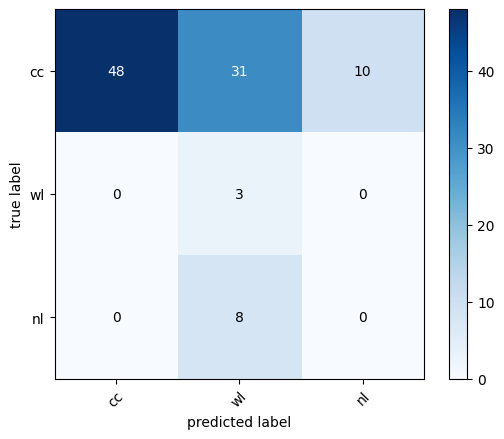

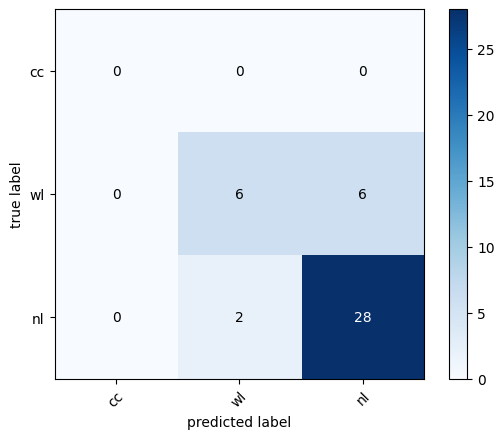

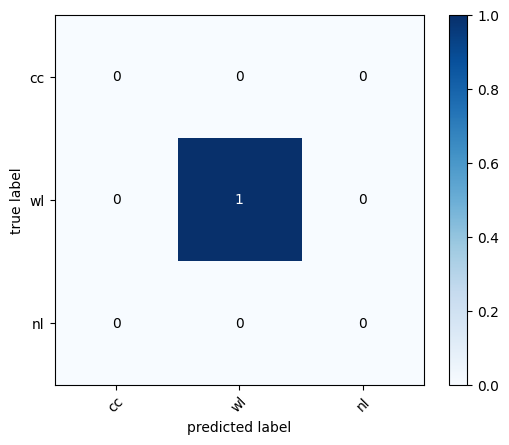

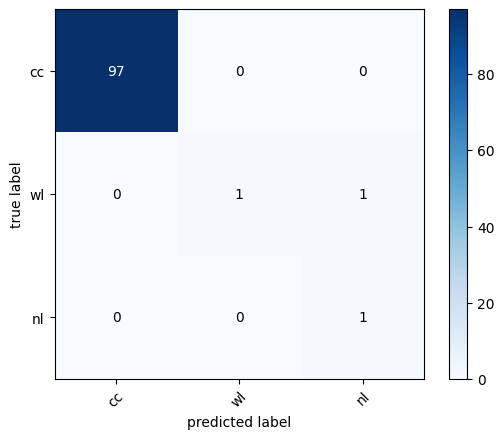

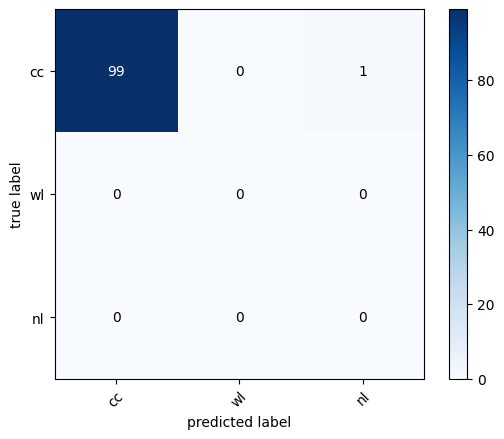

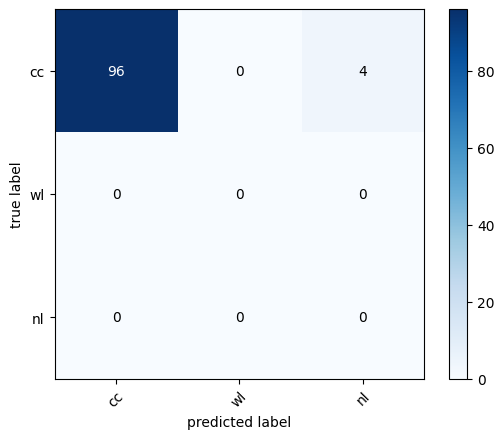

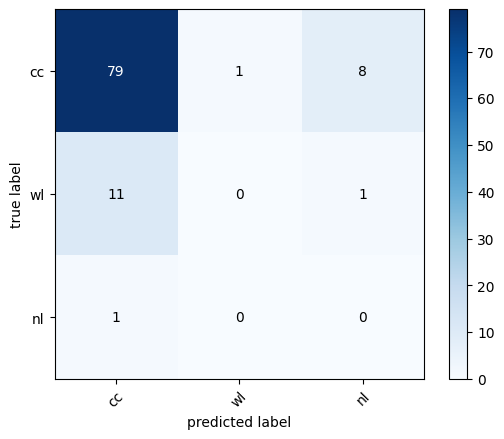

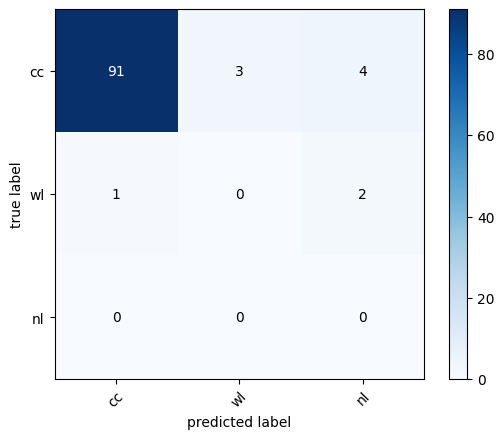

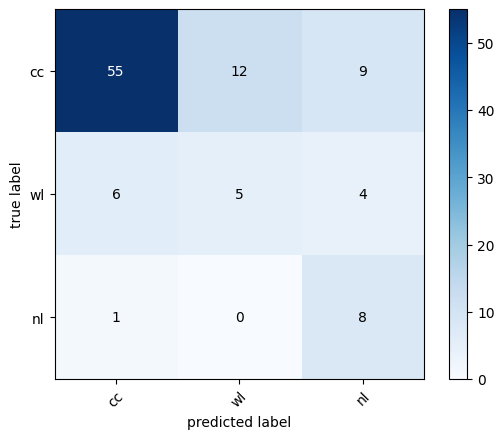

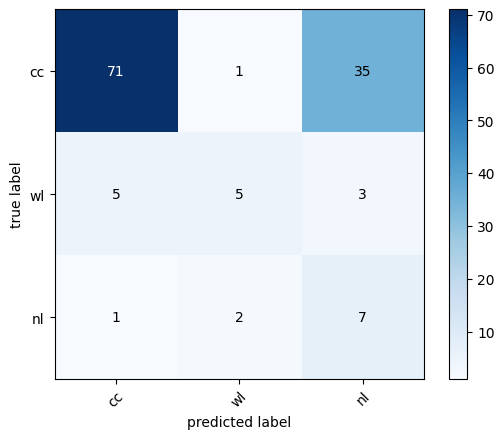

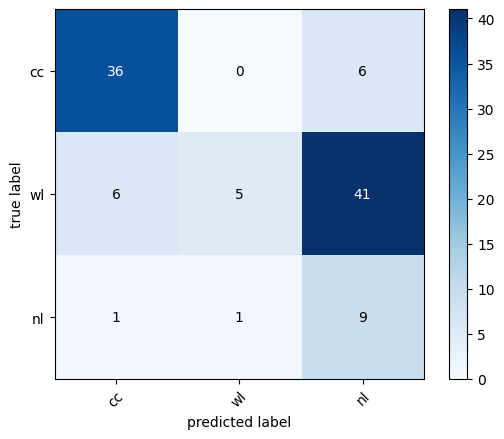

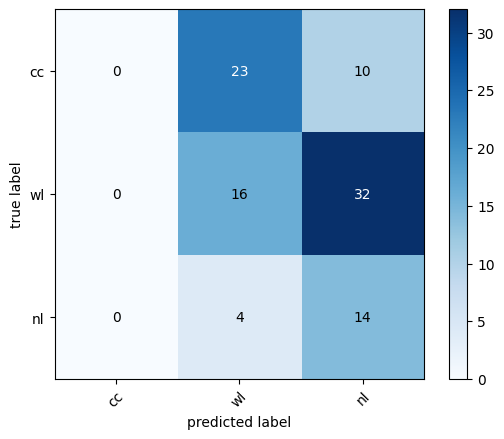

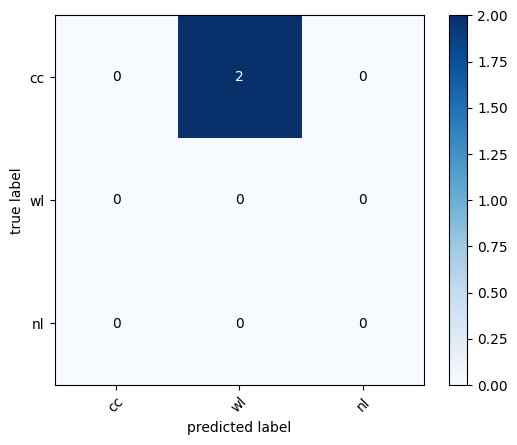

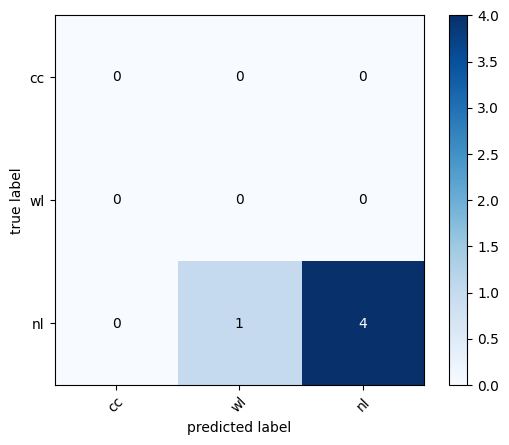

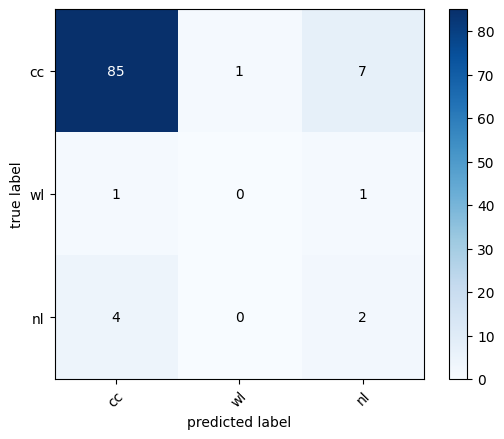

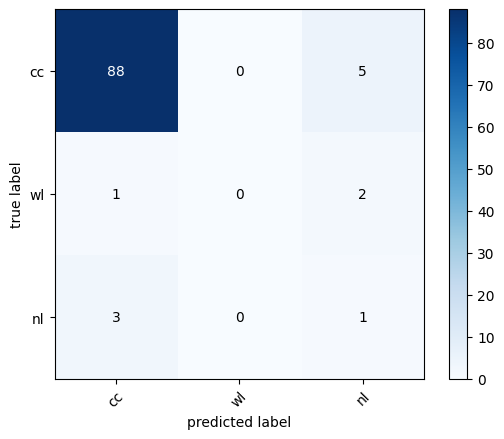

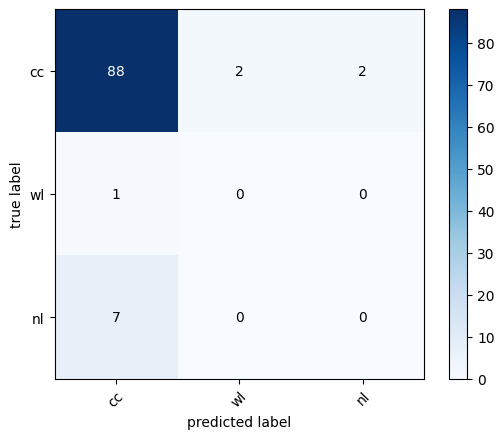

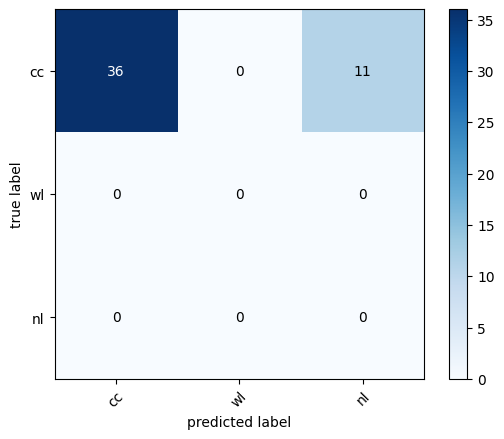

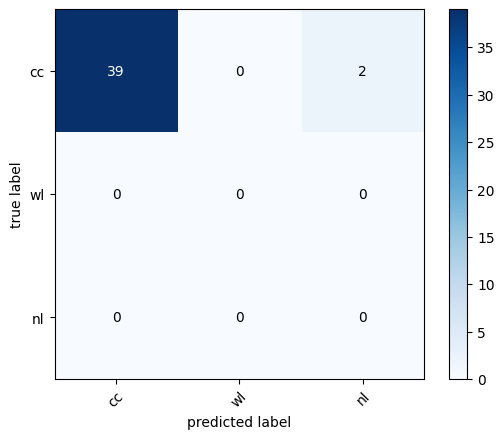

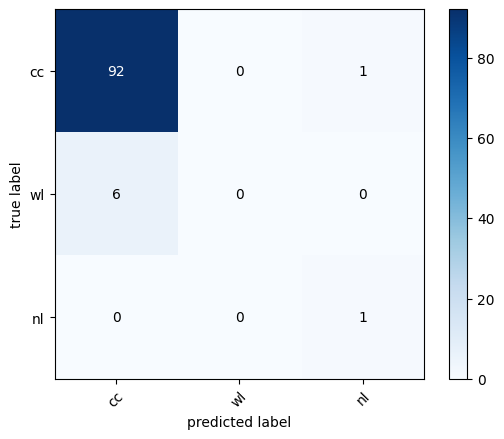

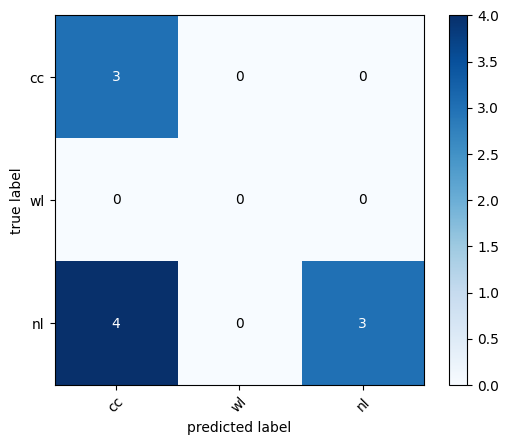

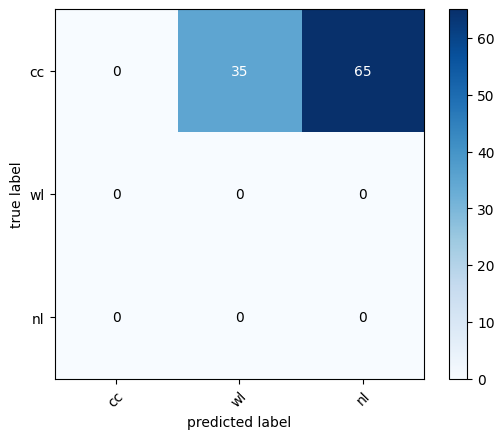

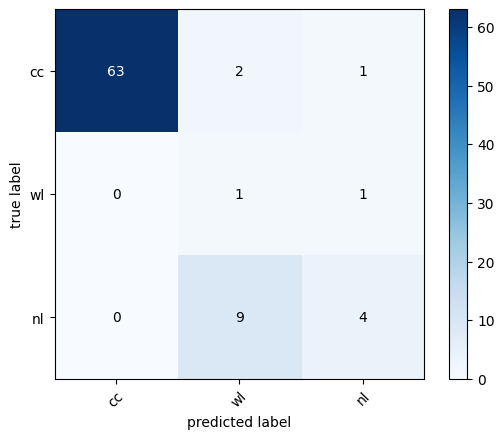

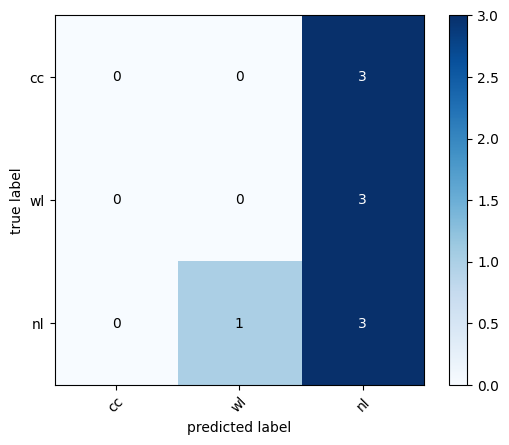

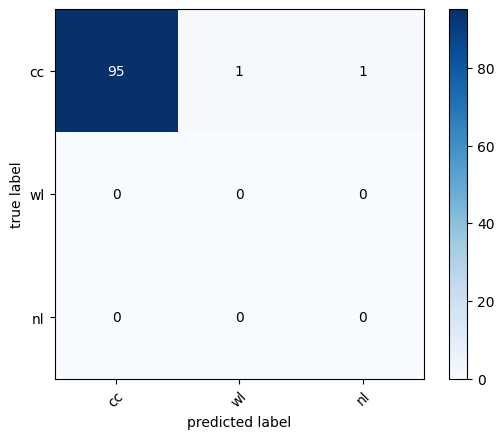

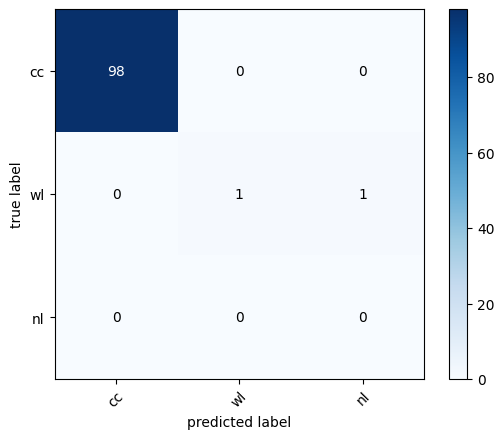

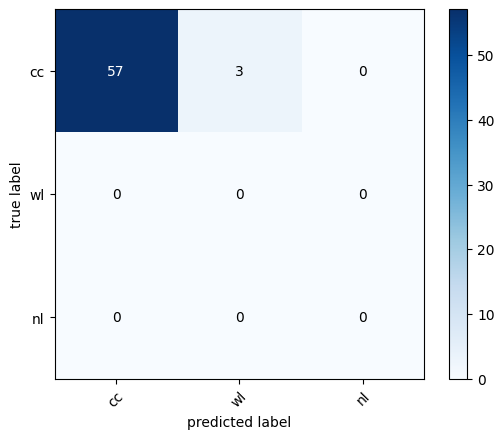

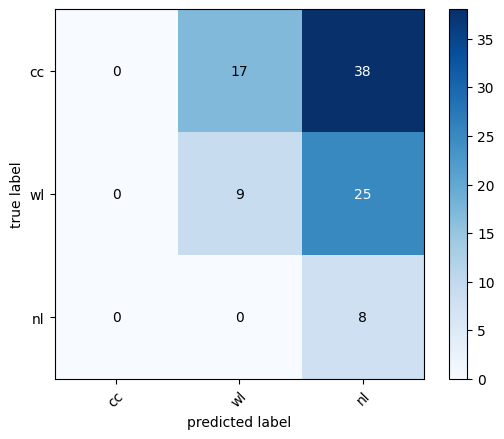

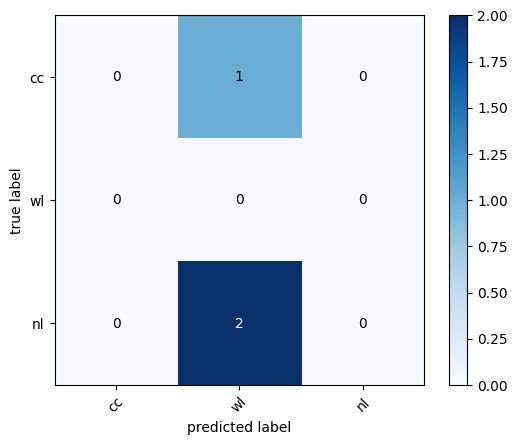

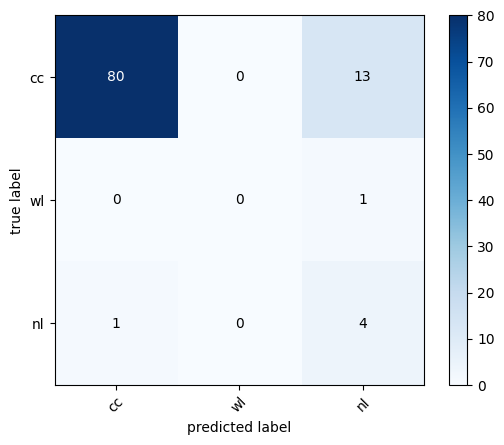

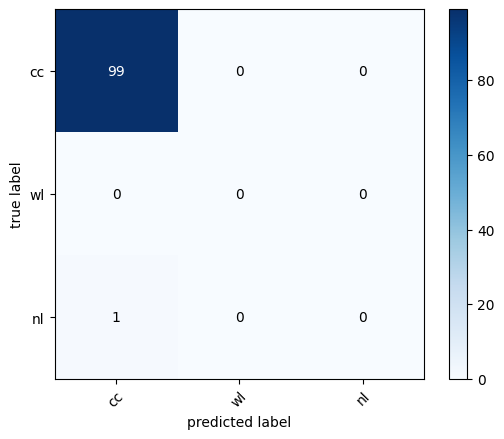

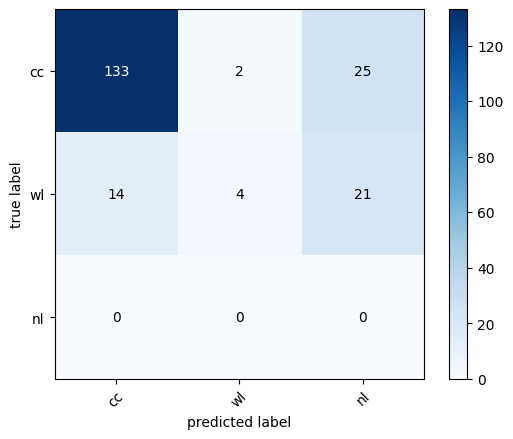

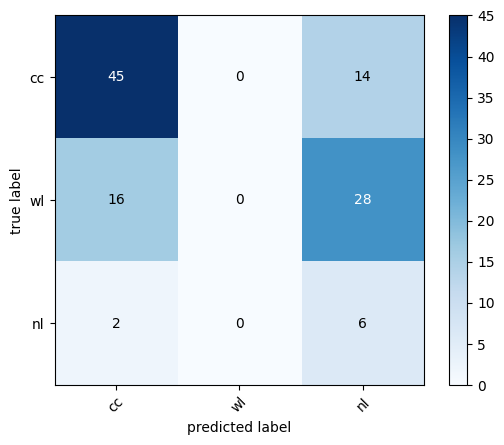

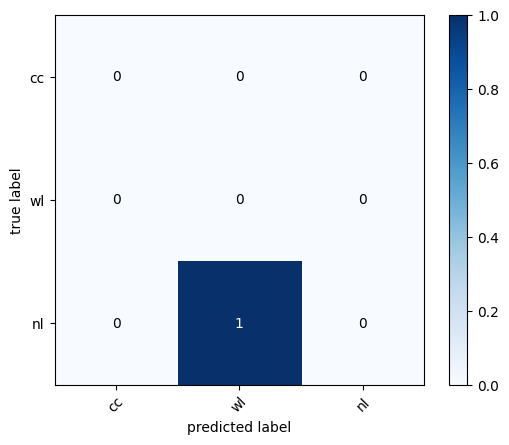

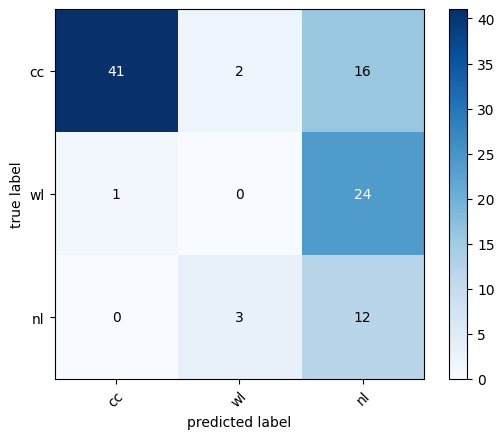

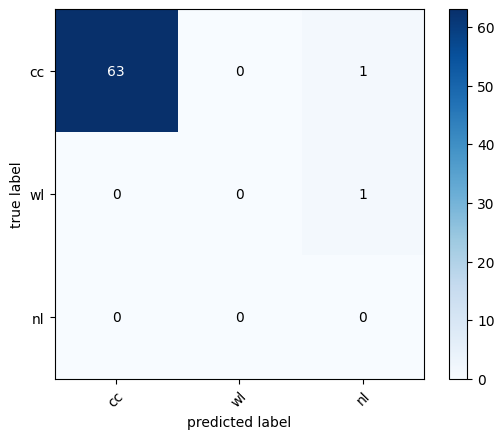

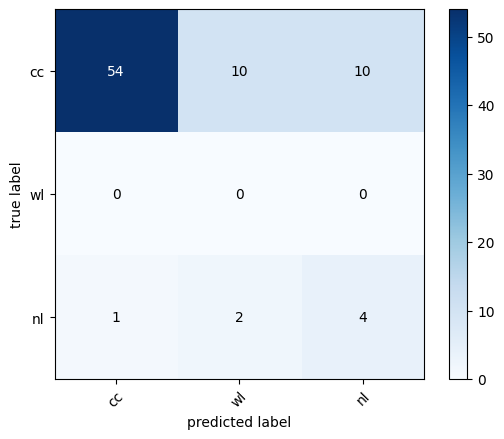

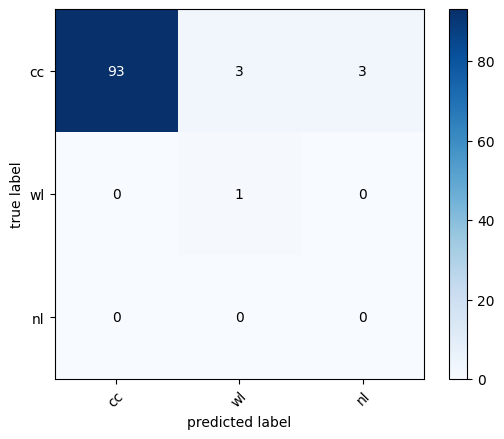

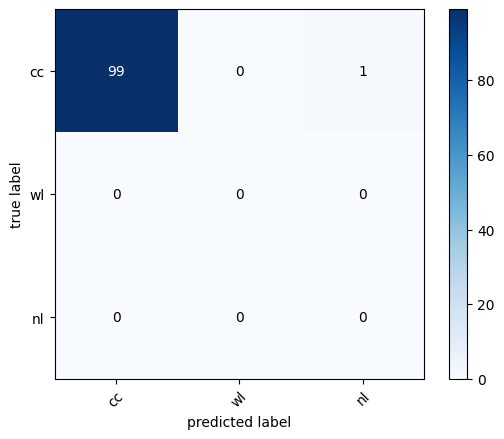

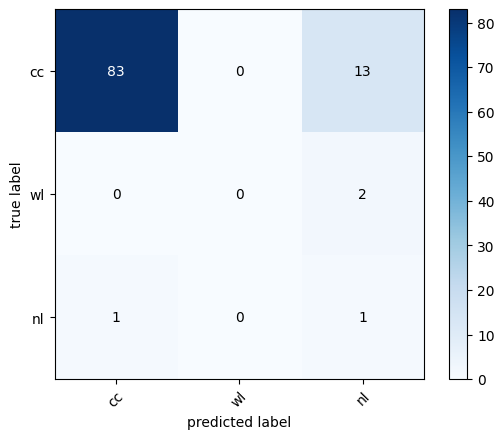

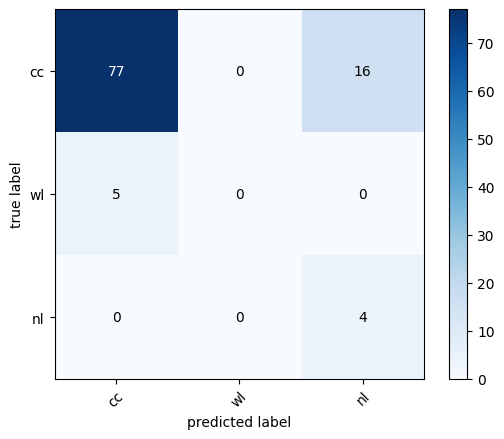

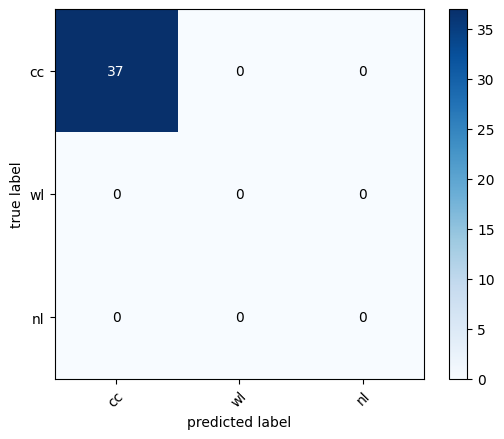

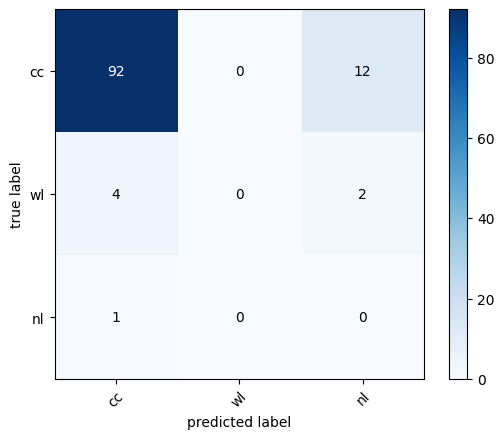

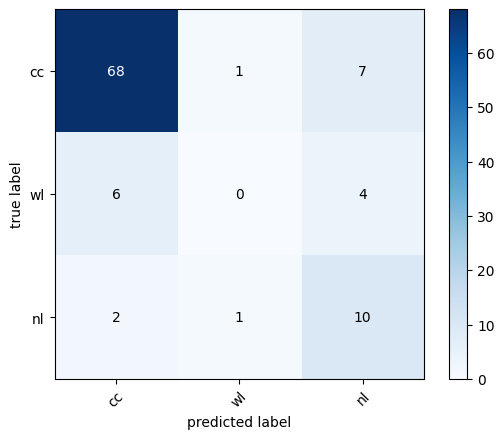

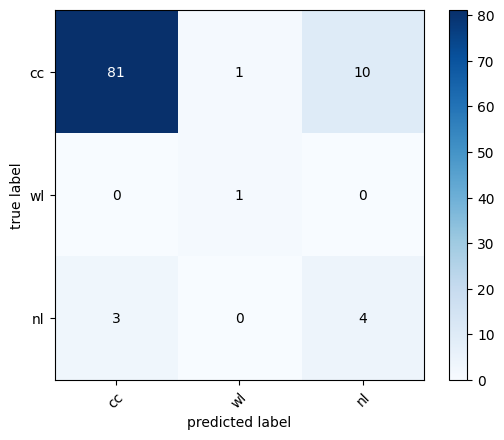

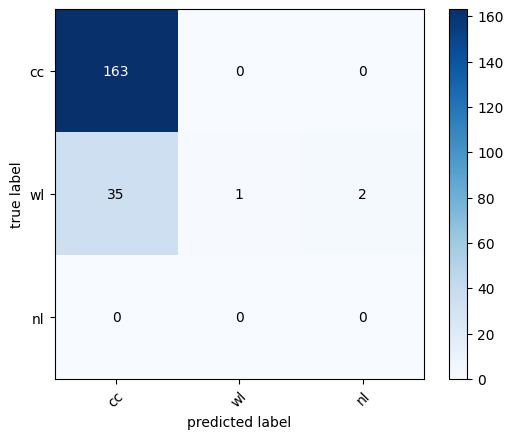

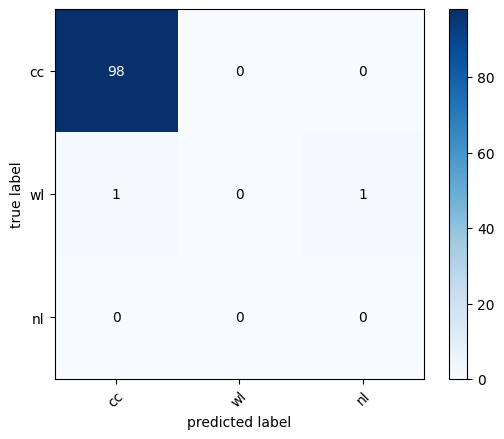

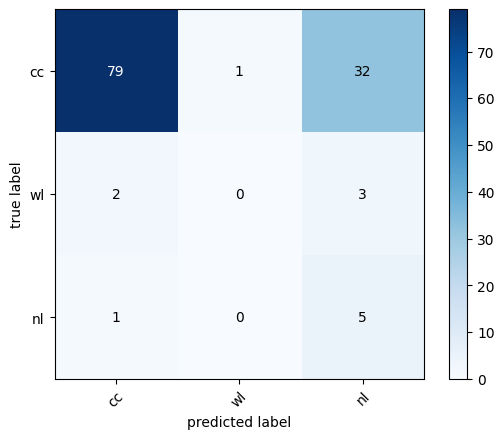

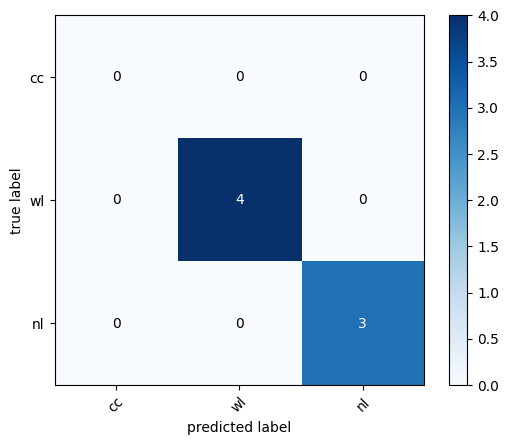

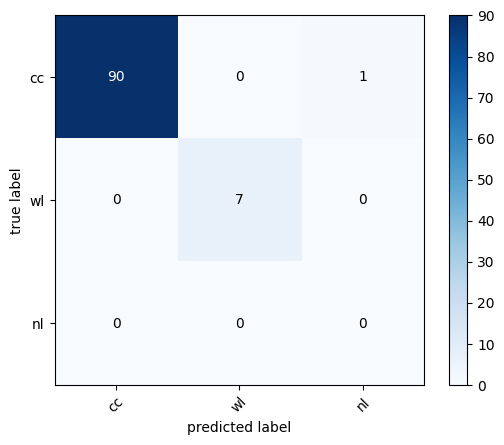

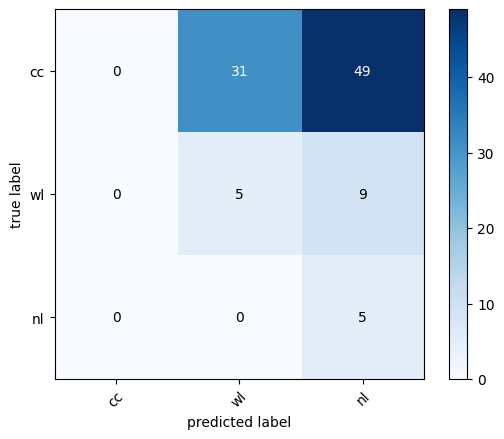

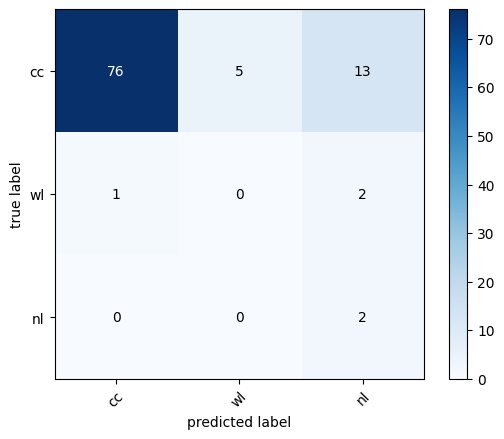

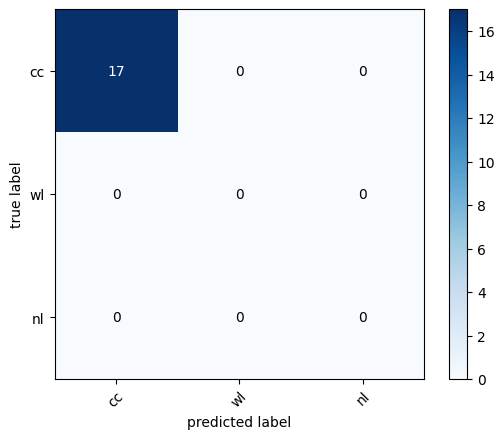

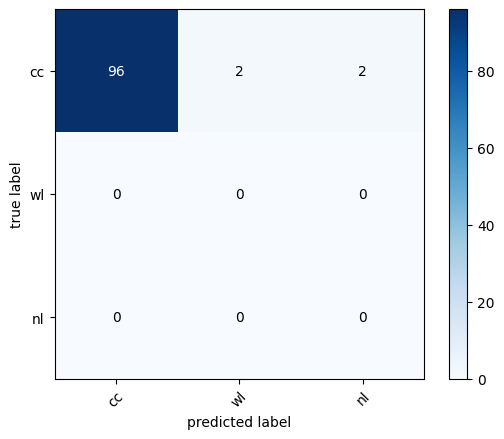

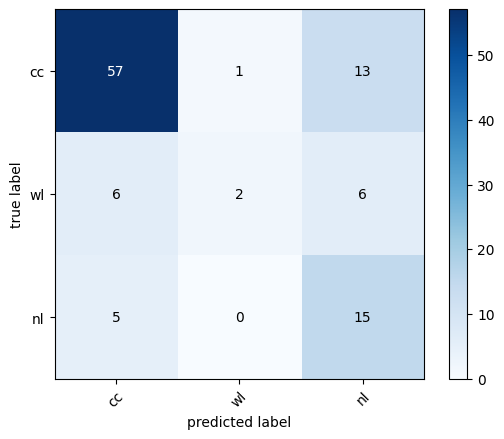

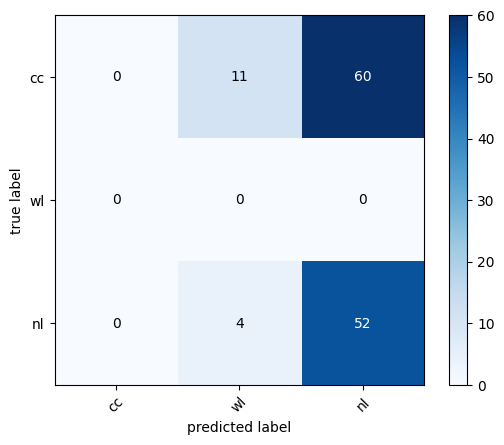

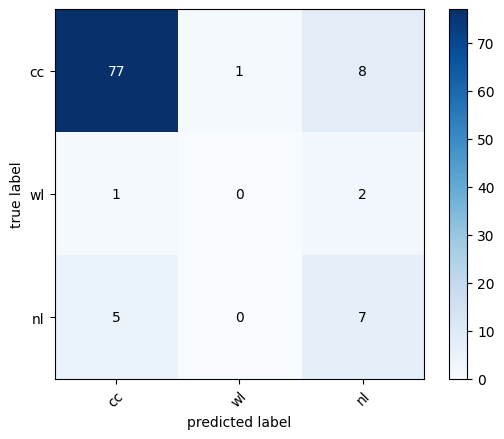

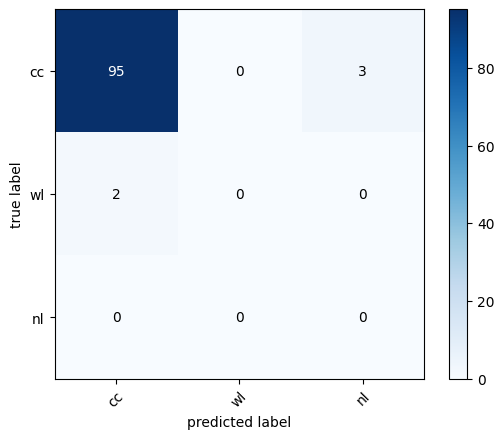

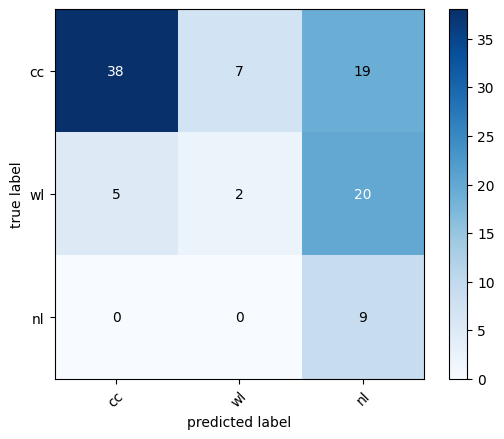

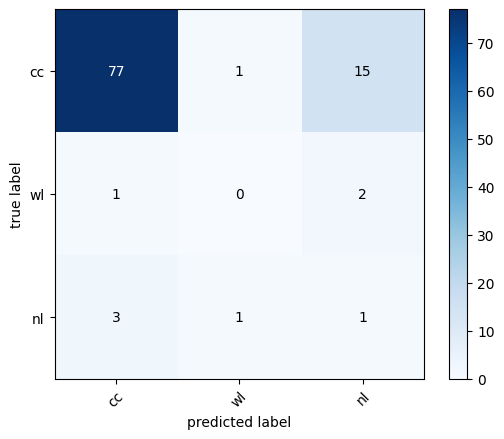

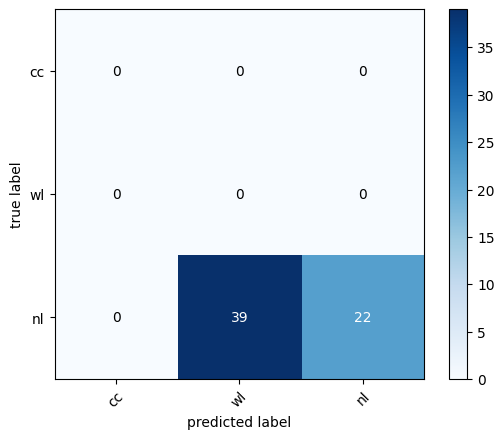

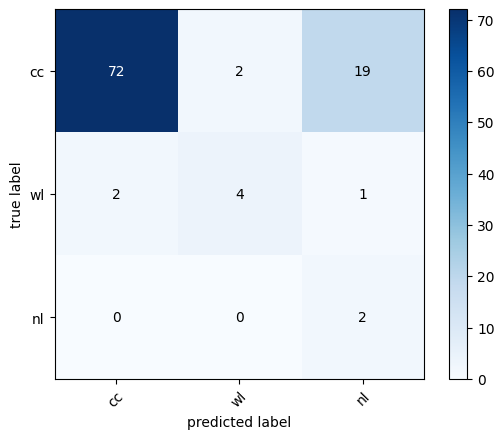

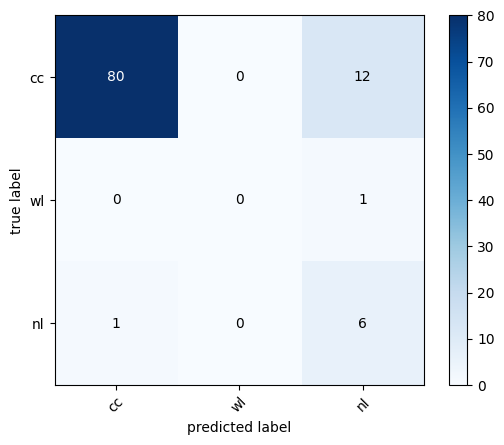

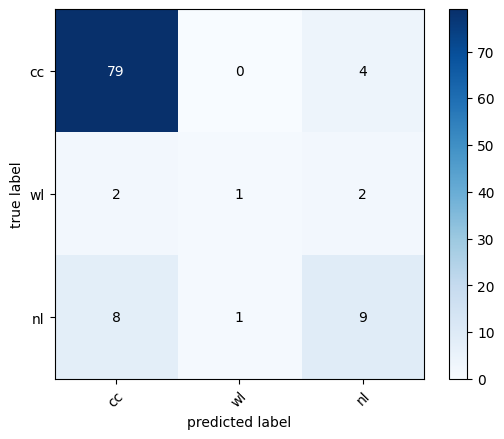

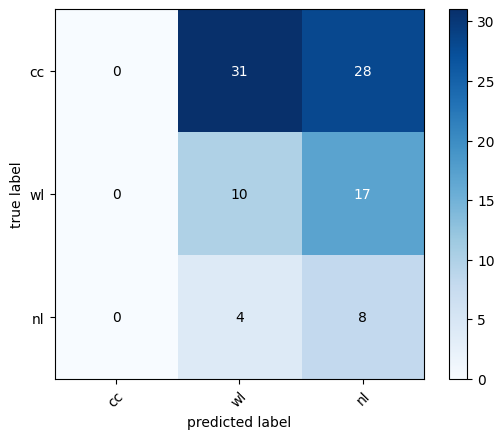

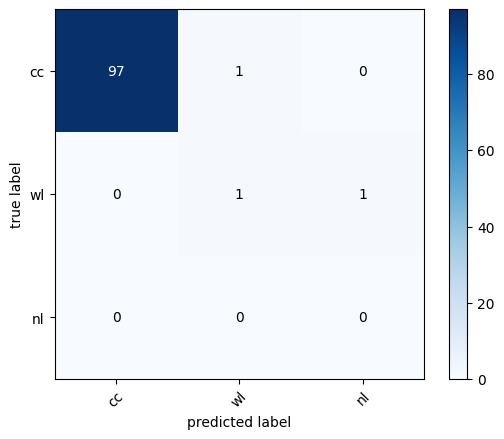

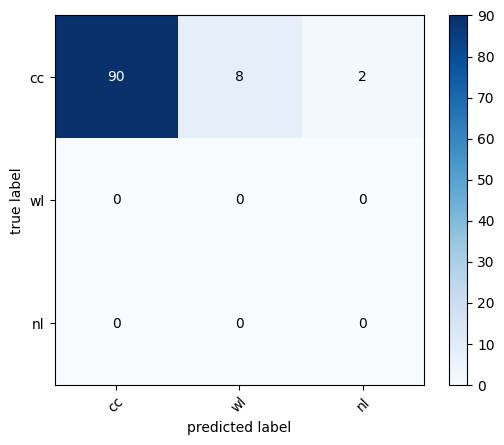

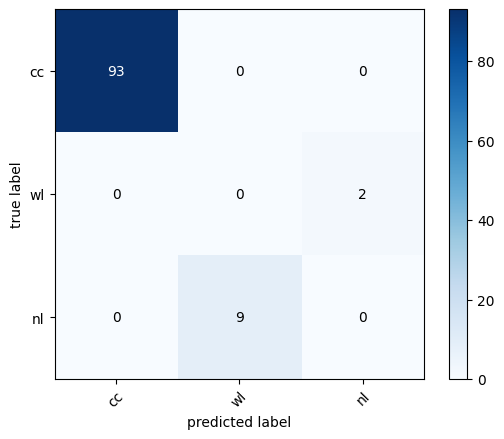

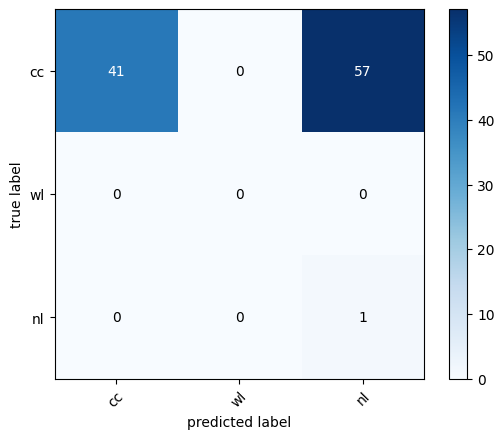

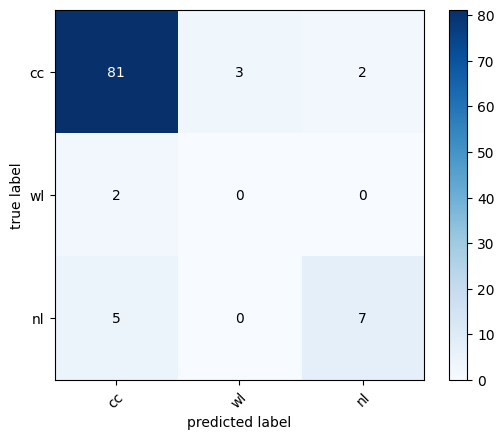

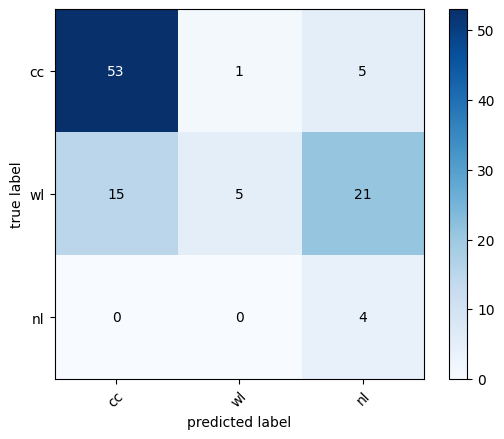

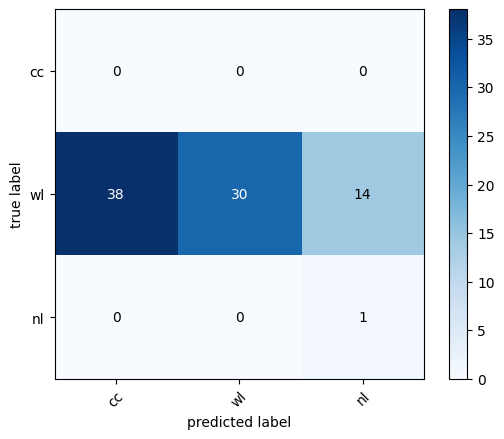

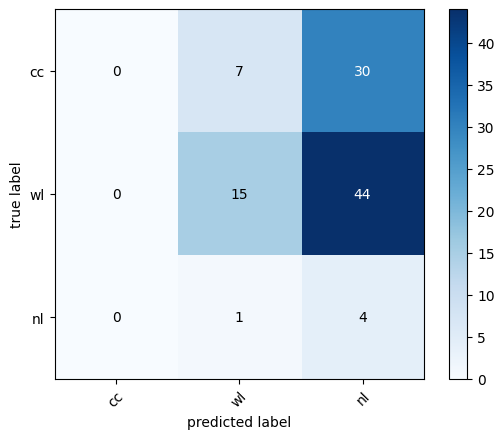

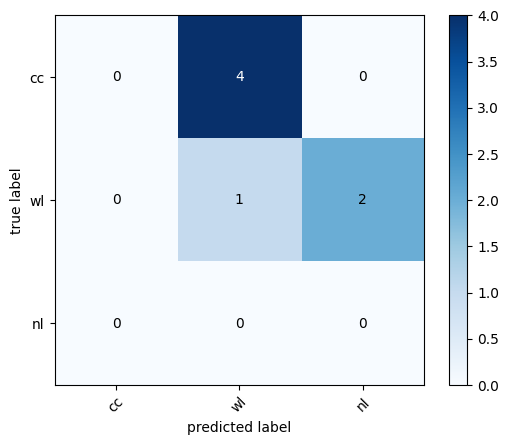

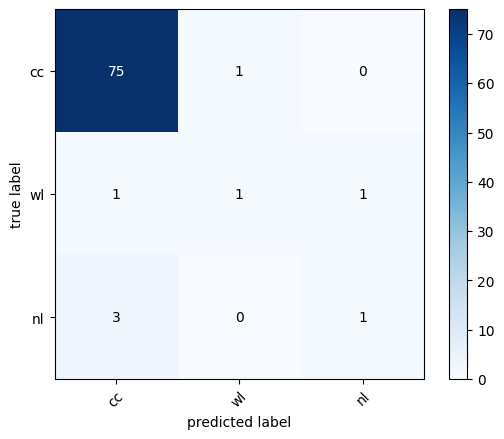

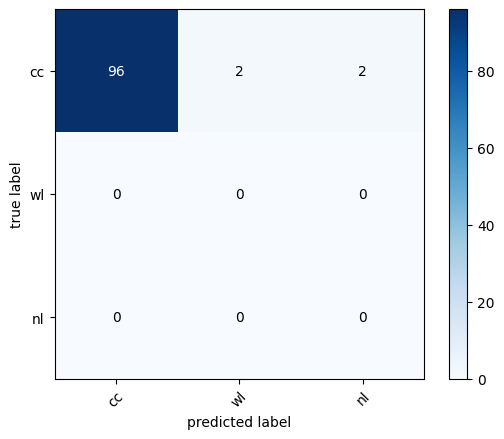

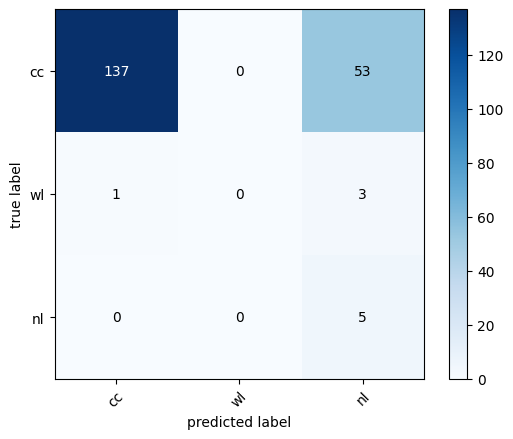

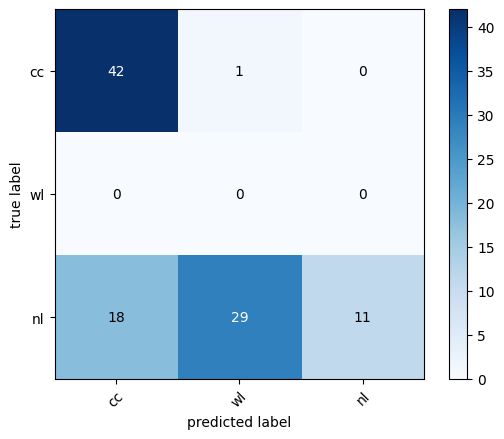

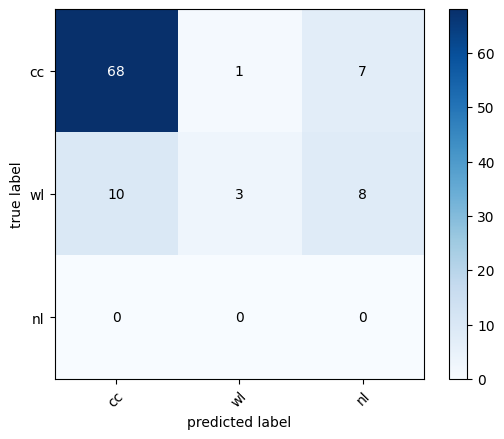

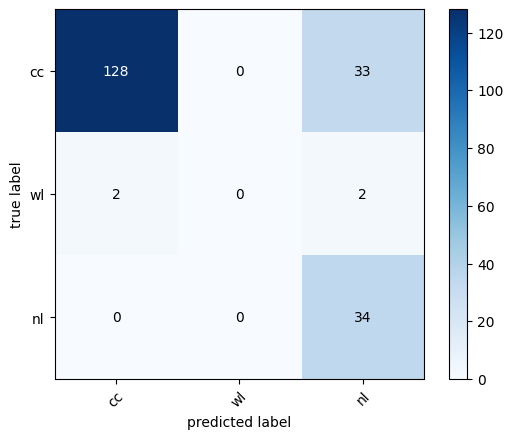

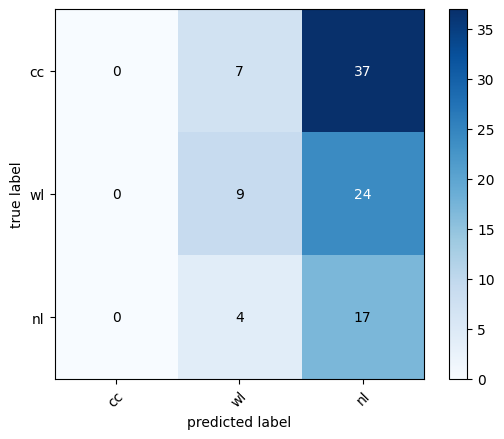

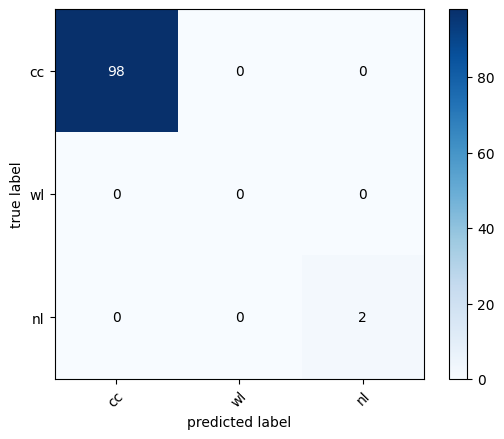

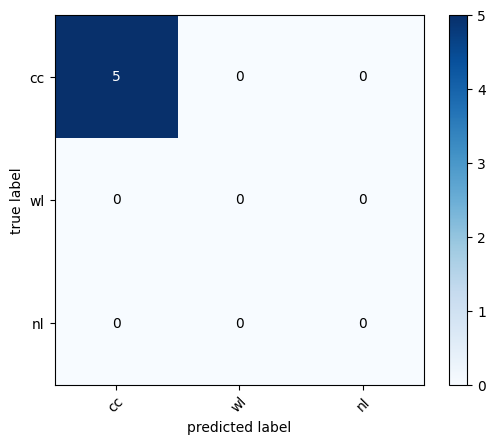

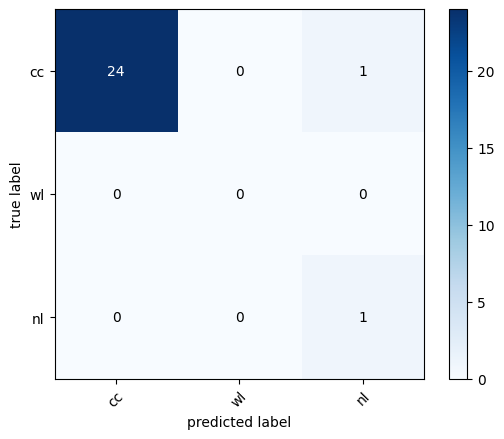

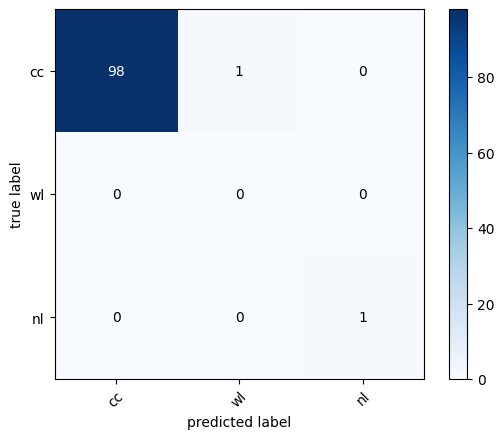

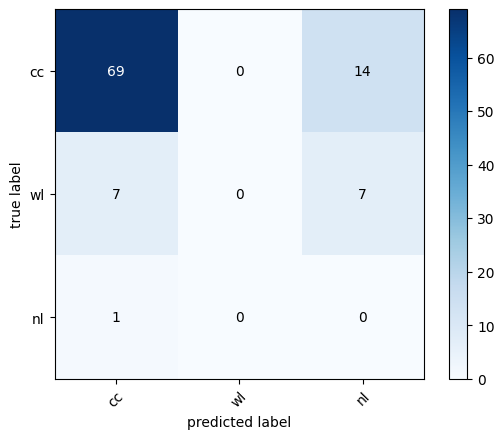

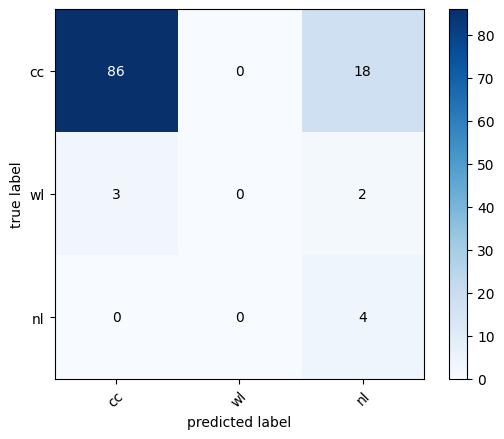

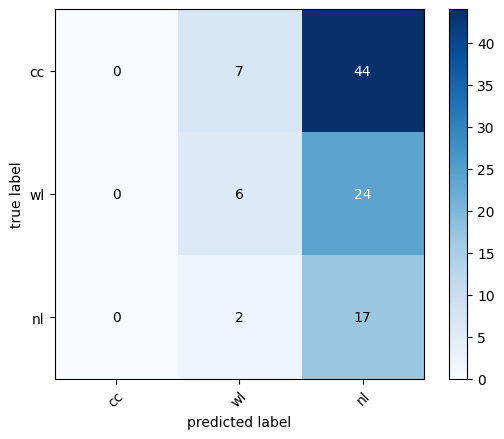

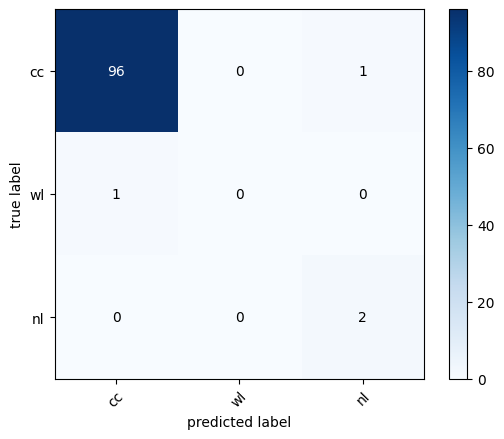

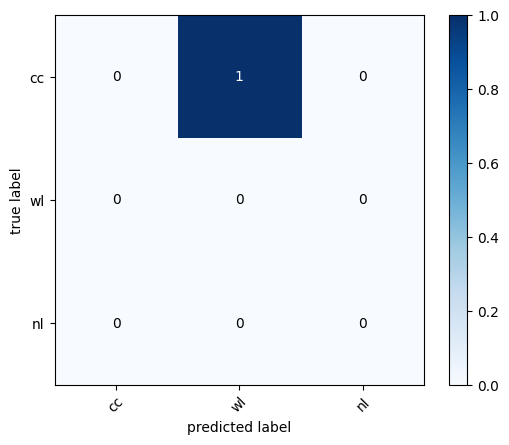

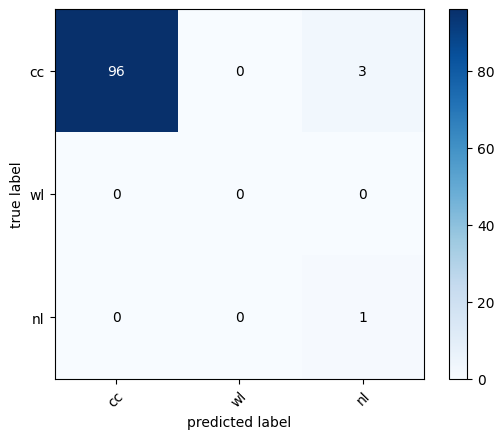

In [58]:
printcm(dic_cm)

In [59]:
#['bo','th','may', 'ba', 'ml', 'ja', 'zh', 'km', 'wuu', 'ml']
corpus = evaluation_corpus().get('mc4.lb')
e = {}
langs, tags, doc_tag = document_tag(corpus)
if check_empty(tags) == True:
        langs, tags, doc_tag = doc_tag_inverse(corpus)
        sentence_tag = tagger_most_common(tags, doc_tag)
        e['name'] = sentence_tag
   
else:   
        sentence_tag = tagger_most_common(tags, doc_tag)
        e['name'] = sentence_tag


100%|██████████| 101/101 [00:04<00:00, 24.04it/s]


In [ ]:
e

In [ ]:
with open("/Users/rmohamed/minic/pam.txt", encoding='utf-8') as f:
    lines = f.read().splitlines()

langs, tags, doc_tag = document_tag(lines)
if doc_tag in ['bo','th','may', 'ba', 'ml', 'ja', 'zh', 'km', 'wuu', 'ml']:
    langs, tags, doc_tag = doc_tag_inverse(lines)
    sentence_tag = tagger_most_common(tags, doc_tag)
    ds = [sentence_tag, langs]
    dd = {}
    for k in sentence_tag.keys():
        dd[k] = tuple(dd[k] for dd in ds)

else:   
    sentence_tag = tagger_most_common(tags, doc_tag)
    ds = [sentence_tag, langs]
    dd = {}
    for k in sentence_tag.keys():
        dd[k] = tuple(dd[k] for dd in ds)

In [ ]:
#aggregating lines togther so it is faster 
with open("/Users/rmohamed/minic/en.txt", encoding='utf-8') as f:
    sample = f.readlines()
chunks = []
for i in range(0, len(sample), 10):
    chunks.append(sample[i:i+10])


In [ ]:
for lines in chunks:
    #langs, tags, doc_tag = doc_tag_inverse(lines)
    langs, tags, doc_tag = document_tag(lines)

    sentence_tag = tagger_most_common(tags, doc_tag)
    #ds = [sentence_tag, langs]

    #dd = {}
    #for k in sentence_tag.keys():
     #   dd[k] = tuple(dd[k] for dd in ds)